# Análisis Exploratorio de Datos (EDA) para ENACOM la Industria de Telecomunicaciones en Argentina

## Introducción
Las telecomunicaciones son fundamentales para la transmisión de información a través de medios electrónicos como la telefonía, televisión, radio e internet. En los últimos años, el internet ha revolucionado la forma en que nos comunicamos, trabajamos, aprendemos y nos entretenemos. La industria de las telecomunicaciones ha jugado un papel vital en nuestra sociedad, permitiendo la comunicación continua incluso en tiempos de pandemia.

Este análisis se centra en la industria de las telecomunicaciones en Argentina, con un enfoque particular en el acceso a internet y otros servicios de comunicación. Utilizando datos proporcionados por el Ente Nacional de Comunicaciones (ENACOM) de Argentina, nuestro objetivo es analizar el comportamiento de este sector a nivel nacional. La información se puede obtener desde la página de [ENACOM Datos Abiertos](https://indicadores.enacom.gob.ar/datos-abiertos).

## Objetivos
1. Realizar un análisis exploratorio de los datos (EDA) para entender el comportamiento del sector de telecomunicaciones en Argentina.
2. Identificar oportunidades de crecimiento y mejora en la calidad de los servicios.
3. Proponer y medir indicadores clave de rendimiento (KPIs) relevantes para la industria.

## Fuente de Datos
Los datos utilizados en este análisis fueron obtenidos de la página del Ente Nacional de Comunicaciones (ENACOM) de Argentina. La ENACOM es el organismo regulador de las telecomunicaciones en Argentina, responsable de la regulación y control de los servicios de comunicación en el país.




In [2]:

# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar las hojas del archivo de Excel
file_path = 'Internet.xlsx'
acc_vel_loc_sinrangos = pd.read_excel(file_path, sheet_name='Acc_vel_loc_sinrangos')
velocidad_sin_rangos = pd.read_excel(file_path, sheet_name='Velocidad_sin_Rangos')
accesos_tecnologia_localidad = pd.read_excel(file_path, sheet_name='Accesos_tecnologia_localidad')
velocidad_por_prov = pd.read_excel(file_path, sheet_name='Velocidad % por prov')



## Observación metricas del df


### eliminar duplicados y manejar duplicados


In [4]:
# Cargar todas las hojas del archivo Excel en un diccionario de DataFrames
sheets_dict = pd.read_excel(file_path, sheet_name=None)


In [5]:
# Función para limpiar cada DataFrame
def limpiar_dataframe(df):
    # Eliminar duplicados
    df = df.drop_duplicates()

    # Llenar valores nulos
    for col in df.columns:
        if df[col].dtype == 'object':  # Columnas categóricas
            df[col].fillna('Desconocido', inplace=True)
        else:  # Columnas numéricas
            df[col].fillna(df[col].mean(), inplace=True)
    
    # Convertir tipos de datos
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass
    
    return df

In [6]:
# Limpiar cada DataFrame en el diccionario
sheets_cleaned = {sheet_name: limpiar_dataframe(df) for sheet_name, df in sheets_dict.items()}


C:\Users\jeiso\AppData\Local\Temp\ipykernel_11980\3189433927.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)
C:\Users\jeiso\AppData\Local\Temp\ipykernel_11980\3189433927.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:

# Guardar las hojas limpias en el mismo archivo Excel
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    for sheet_name, df in sheets_cleaned.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [8]:
print(f"Archivo limpio guardado en {file_path}")

Archivo limpio guardado en Internet.xlsx


# Análisis Univariado
## Histograma de las velocidades de conexión en  la columna aceleración sin rangos
Un acceso se refiere al número de conexiones a internet registradas. Estas conexiones pueden ser a través de diversas tecnologías como ADSL, fibra óptica, cable módem, etc. Este gráfico muestra la distribución de los accesos a internet por diferentes rangos de velocidad de conexión.

### Descripción de los Ejes
- **Eje X:** Rangos de velocidades de conexión (Mbps).
- **Eje Y:** Número de accesos. Cada barra representa la cantidad de conexiones a internet dentro de cada rango de velocidad.




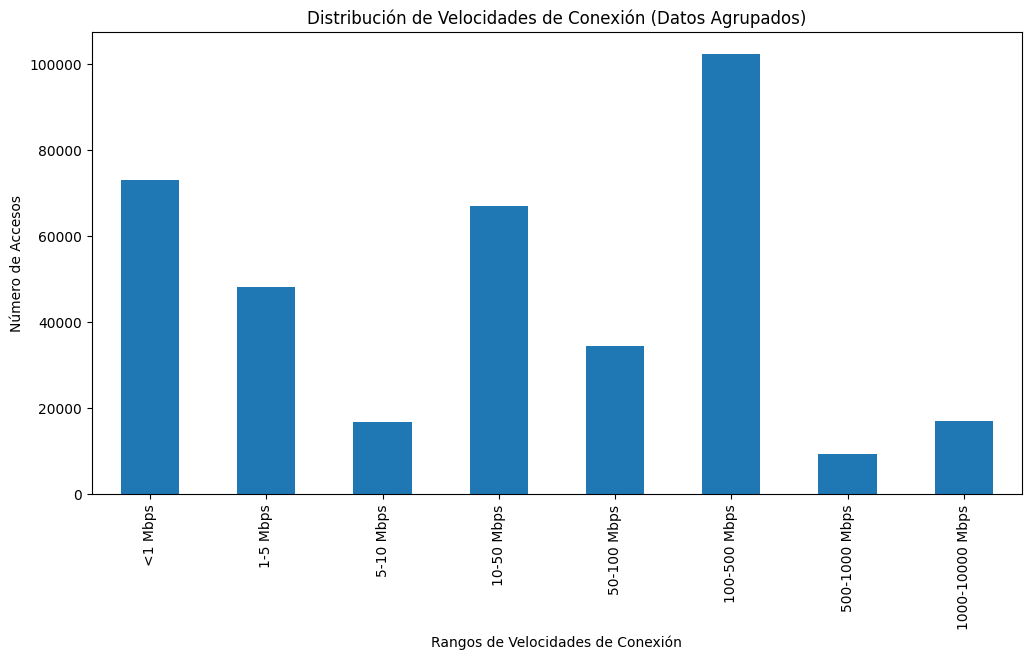

In [9]:
# Limpiar las etiquetas de las columnas para convertirlas a float
velocidades = acc_vel_loc_sinrangos.drop(columns=['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros'])
velocidades.columns = [float(col.replace(',', '.').replace(' Mbps', '')) for col in velocidades.columns]

bins = [0, 1, 5, 10, 50, 100, 500, 1000, 10000]
labels = ['<1 Mbps', '1-5 Mbps', '5-10 Mbps', '10-50 Mbps', '50-100 Mbps', '100-500 Mbps', '500-1000 Mbps', '1000-10000 Mbps']
velocidades_agrupadas = velocidades.apply(lambda x: pd.cut(x, bins=bins, labels=labels).value_counts()).sum(axis=1).reindex(labels, fill_value=0)

# Crear el histograma mejorado
plt.figure(figsize=(12, 6))
velocidades_agrupadas.plot(kind='bar')
plt.title('Distribución de Velocidades de Conexión (Datos Agrupados)')
plt.xlabel('Rangos de Velocidades de Conexión')
plt.ylabel('Número de Accesos')
plt.show()


### Analisis de Gráfica
Este gráfico muestra que la mayoría de los accesos a internet se concentran en los rangos de velocidad de 10-50 Mbps y 100-500 Mbps. Hay una cantidad significativa de accesos en velocidades menores a 1 Mbps y en el rango de 1-5 Mbps. Esto indica que los usuarios en Argentina tienen una variedad de velocidades de conexión, con una tendencia hacia velocidades más altas en los rangos mencionados.


## Relación entre Provincias y Accesos por Tecnología
Ahora vamos a observar la relación entre las velocidades relacionadas con las provincias de argentina.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Total de accesos. Cada punto en el gráfico representa el número total de accesos en una provincia específica.


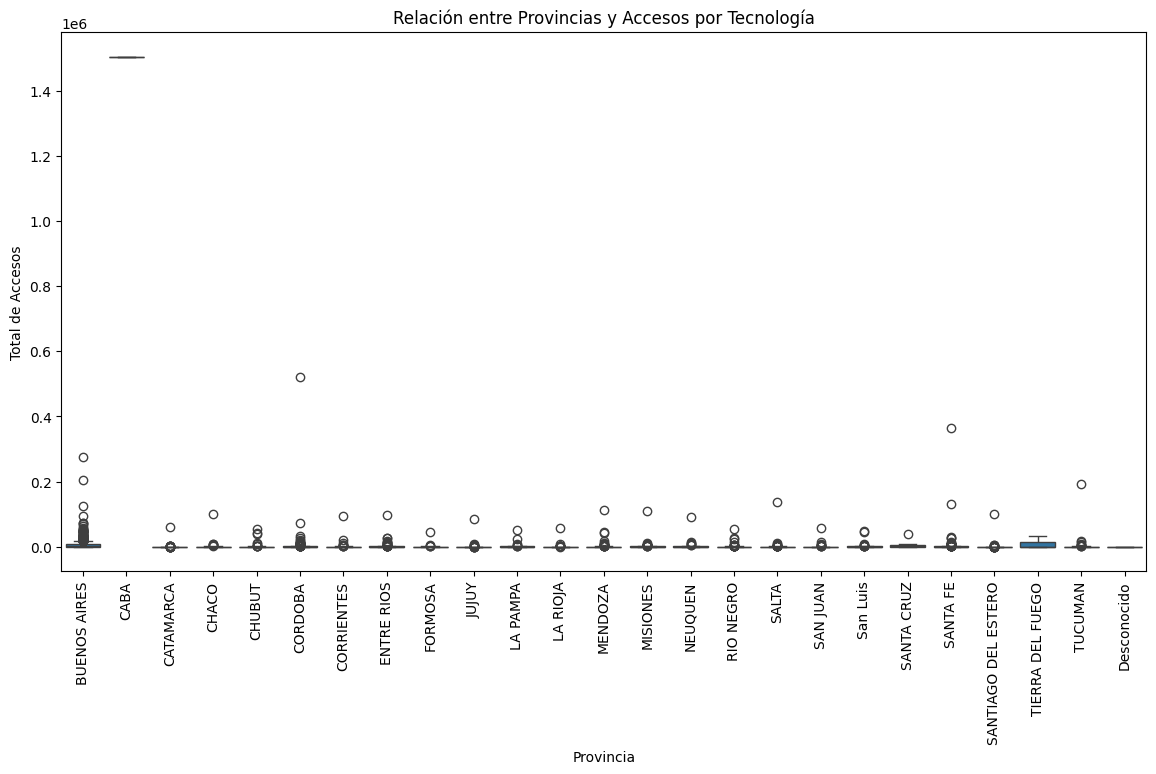

In [10]:
# Relación entre provincias y accesos por tecnología
plt.figure(figsize=(14, 7))
sns.boxplot(x='Provincia', y='Total general', data=accesos_tecnologia_localidad)
plt.xticks(rotation=90)
plt.title('Relación entre Provincias y Accesos por Tecnología')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.show()


### Analisis del Gráfico
El gráfico muestra variaciones significativas en el número total de accesos a internet entre las diferentes provincias de Argentina. A continuación, se detalla la situación de cada provincia:

- **Buenos Aires:** Tiene un rango amplio de accesos con algunos valores atípicos, lo que sugiere una alta variabilidad en los accesos dentro de la provincia.
- **CABA (Ciudad Autónoma de Buenos Aires):** Muestra un número relativamente alto de accesos, aunque con menor variabilidad en comparación con Buenos Aires.
- **Catamarca, Chaco, Chubut, Corrientes, Formosa, Jujuy, La Pampa, La Rioja, Mendoza, Misiones, Neuquén, Río Negro, Salta, San Juan, San Luis, Santa Cruz, Santiago del Estero, Tierra del Fuego, Tucumán:** Estas provincias muestran un número más bajo de accesos y una menor variabilidad, indicando una distribución más homogénea de los accesos a internet.
- **Córdoba, Entre Ríos, Santa Fe:** Presentan un rango de accesos intermedio con algunas variaciones, sugiriendo una penetración de internet más diversa.

podemos evidenciar que las provincias más pobladas y desarrolladas como Buenos Aires y CABA tienen una mayor cantidad de acceso a internet, mientras que las provincias más pequeñas y menos pobladas tienen menos accesos y menor variabilidad.



## Relación entre Provincias y Accesos por Tecnología
Un acceso se refiere al número de conexiones a internet registradas. Estas conexiones pueden ser a través de diversas tecnologías como ADSL, fibra óptica, cable módem, etc. Este gráfico muestra la relación entre las diferentes provincias y el número total de accesos a internet, desglosados por tipo de tecnología.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Total de accesos. Cada caja en el gráfico representa el rango de accesos en una provincia específica.


## observación columnas requeridas para el análisis


In [11]:
# Asegurarse de que las columnas existen y limpiar los nombres de las columnas
accesos_tecnologia_localidad_cleaned = accesos_tecnologia_localidad.rename(columns=lambda x: x.strip())

In [12]:
accesos_tecnologia_localidad_cleaned.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [13]:
# Verificar las columnas disponibles en el DataFrame accesos_tecnologia_localidad_cleaned
accesos_tecnologia_localidad_cleaned.columns


Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general'],
      dtype='object')

## Relación entre Velocidades y Accesos
Este gráfico de dispersión nos permite observar cómo varía el número de accesos a internet en función de diferentes velocidades de conexión. Nos ayuda a identificar patrones y tendencias en la preferencia de los usuarios por ciertas velocidades de conexión.

### Descripción de los Ejes
- **Eje X:** Velocidades de conexión (Mbps).
- **Eje Y:** Total de accesos. Cada punto en el gráfico representa el número total de accesos para una velocidad específica.




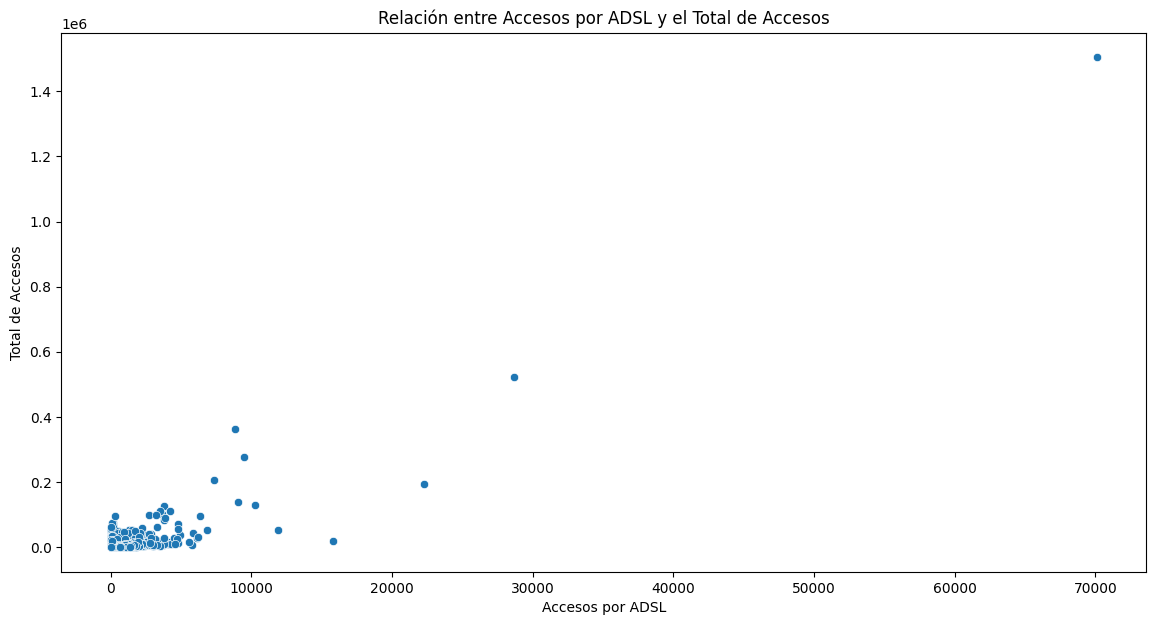

In [14]:
# Relación entre accesos por ADSL y el total de accesos
plt.figure(figsize=(14, 7))
sns.scatterplot(x='ADSL', y='Total general', data=accesos_tecnologia_localidad_cleaned)
plt.title('Relación entre Accesos por ADSL y el Total de Accesos')
plt.xlabel('Accesos por ADSL')
plt.ylabel('Total de Accesos')
plt.show()


### Análisis del Gráfico
Este gráfico muestra que hay una relación directa entre el número de accesos a través de ADSL y el número total de accesos. Algunos puntos clave del análisis incluyen:

- **Accesos bajos por ADSL:** En las regiones donde el número de accesos por ADSL es bajo, el número total de accesos también tiende a ser bajo.
- **Accesos altos por ADSL:** En las regiones con un mayor número de accesos por ADSL, el número total de accesos también es significativamente más alto. Esto sugiere que ADSL sigue siendo una tecnología popular para acceder a internet, especialmente en áreas con infraestructura de telecomunicaciones bien desarrollada.

Podemos inferir que  los accesos por ADSL(Tecnología de cobre) tienen una correlación positiva con el número total de accesos a internet, lo que refleja la mayor relación  de esta tecnología en el panorama actual de telecomunicaciones.


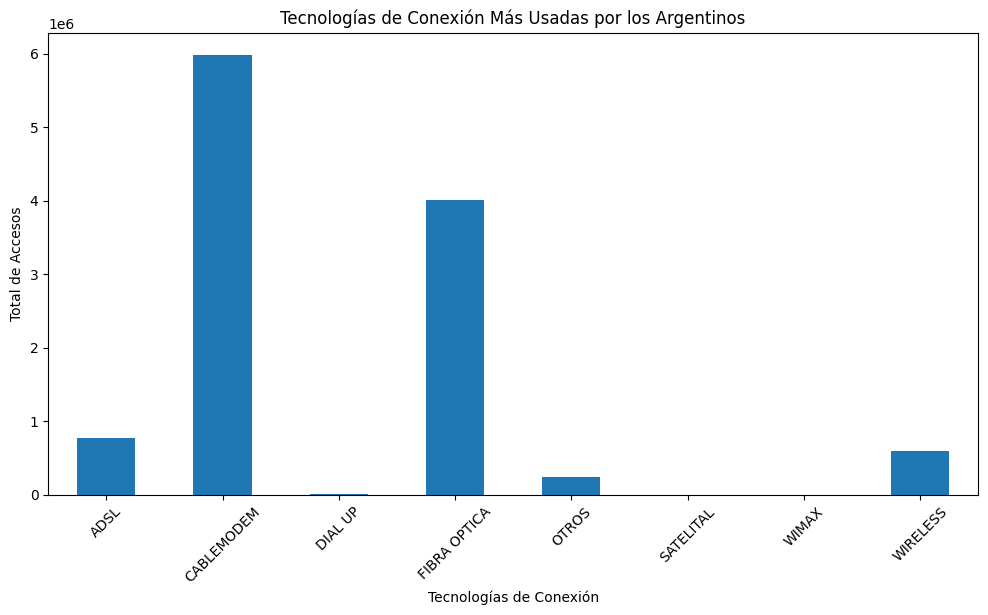

In [15]:
# Agrupar los datos por tipo de tecnología y calcular el total de accesos para cada tecnología
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
total_accesos_tecnologia = accesos_tecnologia_localidad_cleaned[tecnologias].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
total_accesos_tecnologia.plot(kind='bar')
plt.title('Tecnologías de Conexión Más Usadas por los Argentinos')
plt.xlabel('Tecnologías de Conexión')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45)
plt.show()


### Conclusión del Gráfico
Este gráfico muestra la distribución del total de accesos a internet entre las diferentes tecnologías de conexión en Argentina. A continuación, se detallan algunas observaciones clave:

- **Cablemódem:** Esta tecnología es, con diferencia, la más utilizada en Argentina, con más de 6 millones de accesos. Su popularidad puede atribuirse a su capacidad para ofrecer altas velocidades de conexión y su amplia disponibilidad en zonas urbanas.
- **Fibra Óptica:** Es la segunda tecnología más utilizada, con un número significativo de accesos. La fibra óptica es conocida por sus altas velocidades y fiabilidad, lo que la convierte en una opción atractiva para los usuarios que requieren conexiones rápidas y estables.
- **ADSL:** Aunque es menos popular que el Cablemódem y la Fibra Óptica, ADSL sigue siendo una tecnología muy utilizada, especialmente en áreas donde la infraestructura de cablemódem no está disponible.
- **Wireless:** Esta tecnología tiene una presencia notable, lo que indica su importancia en áreas rurales o donde la infraestructura de cablemódem y ADSL es limitada.
- **Otras Tecnologías:** Las tecnologías como Dial-Up, Satelital y WIMAX tienen un número relativamente bajo de accesos, lo que refleja su uso limitado en comparación con las tecnologías más modernas.

### Análisis Comparativo
- **Comparación Cablemódem vs. Fibra Óptica:** Aunque el Cablemódem es la tecnología dominante, la Fibra Óptica está ganando terreno rápidamente debido a sus ventajas en términos de velocidad y fiabilidad.
- **Comparación ADSL vs. Wireless:** El ADSL sigue siendo una tecnología relevante, pero el Wireless está ganando importancia en áreas donde otras infraestructuras no están disponibles.

 el Cablemódem y la Fibra Óptica son las tecnologías de conexión a internet más usadas en Argentina, con una tendencia creciente hacia la adopción de Fibra Óptica debido a sus ventajas tecnológicas de velocidad y versatilidad. 


## Análisis de la Penetración de Internet en la Población
En este análisis, se evalúa cómo la penetración de internet varía entre las diferentes provincias de Argentina y cuál es la relación con la población.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Penetración de internet en la población (porcentaje).

### Análisis del Gráfico
Este gráfico de barras nos permite observar el porcentaje de la población que tiene acceso a internet en cada provincia.


In [16]:
# Cargar los datos de penetración de internet en la población
penetracion_poblacion = pd.read_excel(file_path, sheet_name='Penetración-poblacion')

# Verificar las columnas disponibles en el DataFrame
penetracion_poblacion.columns


Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

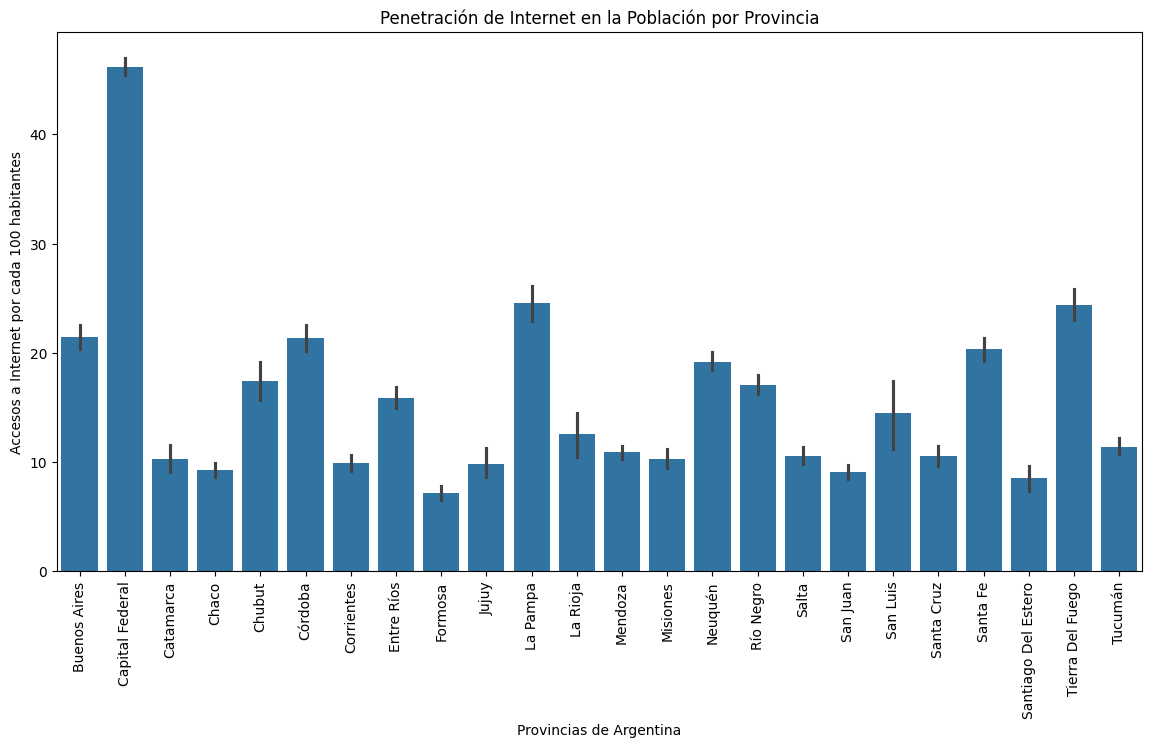

In [17]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=penetracion_poblacion)
plt.title('Penetración de Internet en la Población por Provincia')
plt.xlabel('Provincias de Argentina')
plt.ylabel('Accesos a Internet por cada 100 habitantes')
plt.xticks(rotation=90)
plt.show()


### Análisis del Gráfico
Este gráfico muestra la penetración de internet en la población de cada provincia de Argentina. A continuación, se detallaran algunas observaciones clave:

- **Buenos Aires y Capital Federal:** Estas dos regiones muestran la mayor penetración de internet, con Buenos Aires destacándose particularmente. Esto sugiere una infraestructura de telecomunicaciones bien desarrollada y una alta adopción de servicios de internet en estas áreas metropolitanas.
- **La Pampa y Tierra del Fuego:** También muestran una alta penetración de internet, aunque menor que Buenos Aires y Capital Federal. Esto podría deberse a iniciativas locales para mejorar el acceso a internet.
- **Provincias con Penetración Intermedia:** Provincias como Córdoba, Santa Fe, y Mendoza tienen una penetración intermedia, lo que indica una adopción moderada de servicios de internet.
- **Provincias con Baja Penetración:** Provincias como Formosa, San Luis y Santiago del Estero muestran una penetración de internet más baja. Esto podría estar relacionado con desafíos en la infraestructura, menor densidad poblacional o menores ingresos per cápita.
- **Variabilidad:** Hay una variabilidad significativa en la penetración de internet entre las diferentes provincias, lo que destaca la importancia de las políticas y esfuerzos para mejorar el acceso a internet en áreas menos desarrolladas.



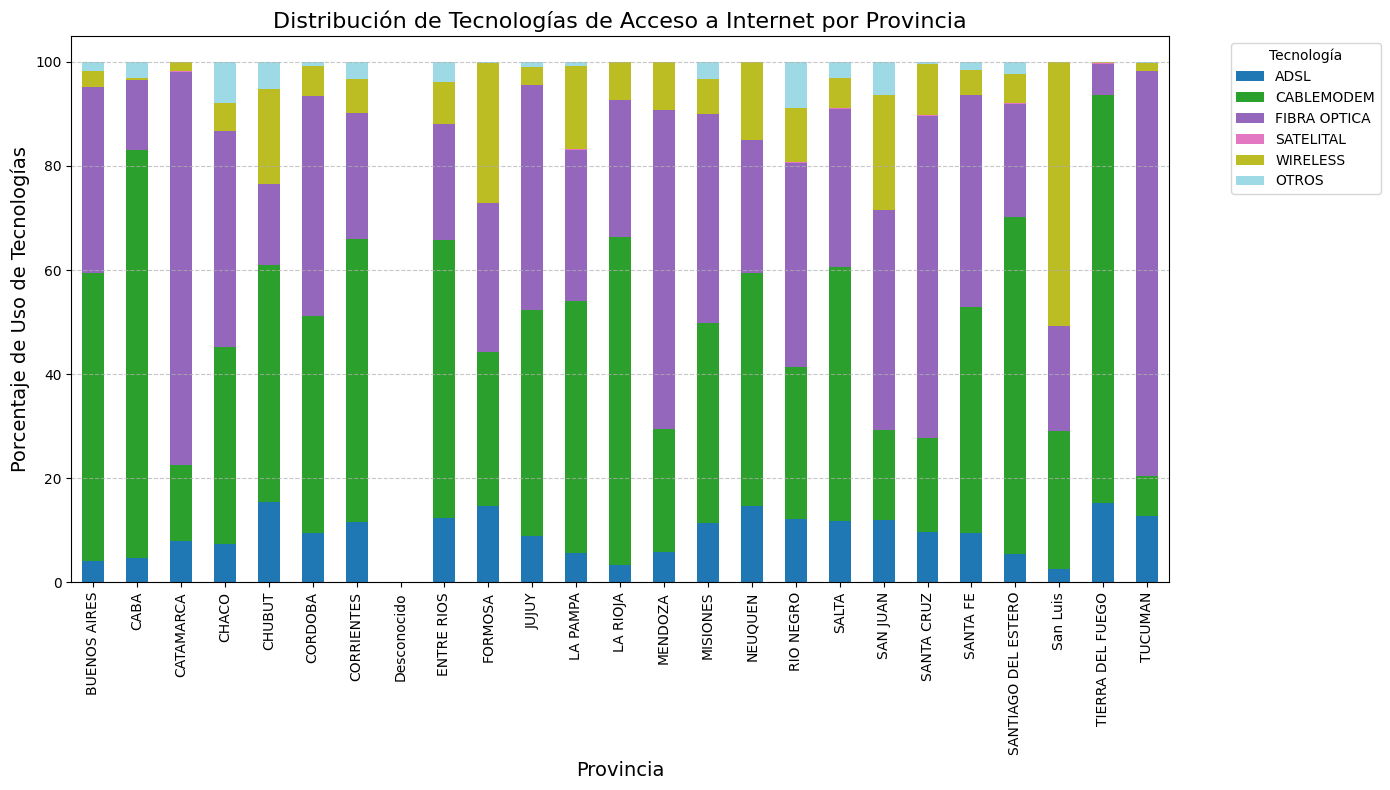

In [18]:
# Seleccionar las columnas relevantes para el análisis de tecnologías por provincia
df_tecnologias = accesos_tecnologia_localidad[['Provincia', 'ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS', 'OTROS']]

# Agrupar los datos por provincia y sumar las tecnologías
df_tecnologias_agg = df_tecnologias.groupby('Provincia').sum()

# Normalizar los datos para mostrar proporciones
df_tecnologias_agg_pct = df_tecnologias_agg.div(df_tecnologias_agg.sum(axis=1), axis=0) * 100

# Crear un gráfico apilado de barras
df_tecnologias_agg_pct.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribución de Tecnologías de Acceso a Internet por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Porcentaje de Uso de Tecnologías', fontsize=14)
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Análisis de la gráfica:
Podemos observar que las tecnologías que predominan son Wireless cable modem y fibra pero debemos preguntarnos cual de ellas nos brinda mayor estabilidad es por eso que presentaremos la siguiente relación :

In [19]:
# Verificamos columnas disponibles
df.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

In [20]:
# Fusionar los DataFrames en la columna común 'Provincia'
merged_df = pd.merge(accesos_tecnologia_localidad, velocidad_por_prov, on='Provincia')



In [21]:
# Asegurar que las provincias en ambos DataFrames son del mismo tipo (str, por ejemplo)
accesos_tecnologia_localidad['Provincia'] = accesos_tecnologia_localidad['Provincia'].astype(str)
velocidad_por_prov['Provincia'] = velocidad_por_prov['Provincia'].astype(str)

# Rellenar valores nulos si es necesario
accesos_tecnologia_localidad = accesos_tecnologia_localidad.fillna(method='ffill')
velocidad_por_prov = velocidad_por_prov.fillna(method='ffill')


C:\Users\jeiso\AppData\Local\Temp\ipykernel_11980\1783500361.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  accesos_tecnologia_localidad = accesos_tecnologia_localidad.fillna(method='ffill')
C:\Users\jeiso\AppData\Local\Temp\ipykernel_11980\1783500361.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  velocidad_por_prov = velocidad_por_prov.fillna(method='ffill')


### Velocidades por tecnología promedio

In [22]:
# enumerar promedios
tecnologias = ['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS', 'OTROS']
velocidades_promedio = merged_df[tecnologias].mean()


## Graficar relaciones

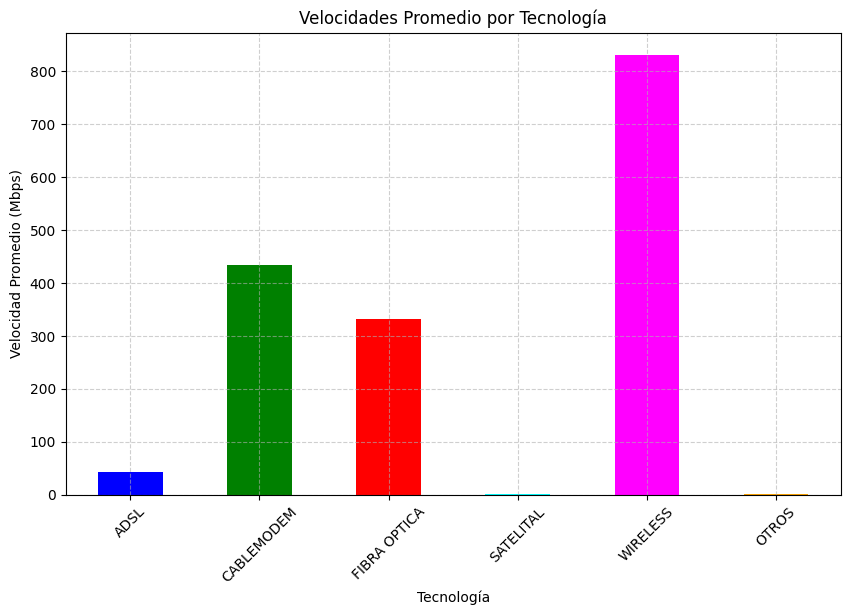

In [23]:
import matplotlib.pyplot as plt

# Graficar las velocidades promedio por tecnología
plt.figure(figsize=(10, 6))
velocidades_promedio.plot(kind='bar', color=['blue', 'green', 'red', 'cyan', 'magenta', 'orange'])
plt.title('Velocidades Promedio por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


podemos ver que en la gran mayoria de provincias estan dando un avance tecnologíco ya que la tecnología menos estable que es la ADSL y satelital en terminos de velocidad cada es cada vez menos acogida por el avance tecnologico de los argentinos

## Análisis:
Podemos ver en la tabla que pese a qu ela velocidad de la fibra es mayor la estabilidad que representa la velocidad observada es mejor con tecnologías como cable modem o Wireless

## Análisis Temporal de los Accesos a Internet
En este análisis, evaluamos cómo han cambiado los accesos a internet a lo largo del tiempo (por año y trimestre) para identificar tendencias y patrones de crecimiento.

### Descripción de los Ejes
- **Eje X:** Año y trimestre.
- **Eje Y:** Total de accesos a internet.

### Análisis del Gráfico
Este gráfico de líneas nos permite observar las tendencias en el crecimiento de los accesos a internet en Argentina a lo largo del tiempo.


In [24]:
# Cargar los datos de acceso por año y trimestre
accesos_por_tiempo = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')

# Verificar las columnas disponibles en el DataFrame
accesos_por_tiempo.columns

Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')

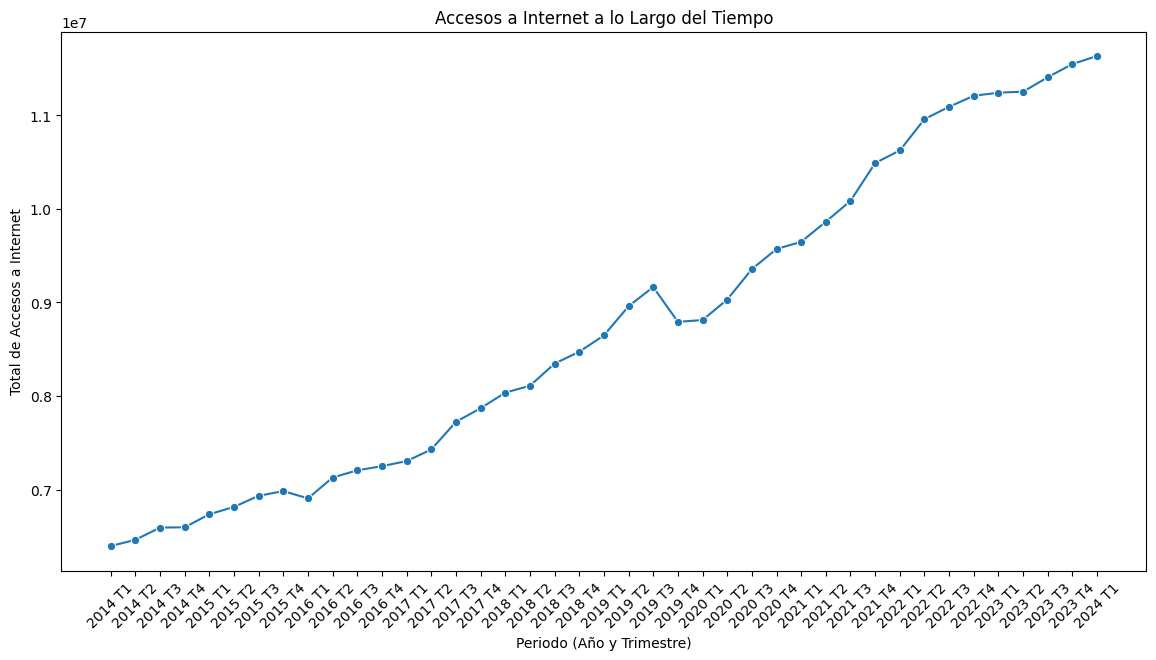

In [25]:
# Cargar los datos de acceso por año y trimestre
accesos_por_tiempo = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')

# Agrupar los datos por año y trimestre, y calcular el total de accesos para cada periodo
accesos_por_tiempo_grouped = accesos_por_tiempo.groupby(['Año', 'Trimestre']).sum().reset_index()

# Crear una columna combinada de año y trimestre para el eje x
accesos_por_tiempo_grouped['Periodo'] = accesos_por_tiempo_grouped['Año'].astype(str) + ' T' + accesos_por_tiempo_grouped['Trimestre'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))
sns.lineplot(x='Periodo', y='Total', data=accesos_por_tiempo_grouped, marker='o')
plt.title('Accesos a Internet a lo Largo del Tiempo')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Total de Accesos a Internet')
plt.xticks(rotation=45)
plt.show()



### Análisis del Gráfico
Este gráfico muestra cómo han cambiado los accesos a internet en Argentina a lo largo del tiempo. A continuación, se detallan algunas observaciones clave:

- **Tendencia General:** La gráfica muestra una tendencia general al alza en el número de accesos a internet, lo que indica un crecimiento continuo en la adopción de servicios de internet en el país.
- **Crecimiento Continuo:** A lo largo de los años, el crecimiento de los accesos a internet ha sido constante, con una notable aceleración en ciertos periodos.
- **Impacto de Eventos:** Algunos picos y valles en la gráfica pueden estar relacionados con eventos específicos, como la implementación de nuevas políticas de telecomunicaciones, el lanzamiento de promociones o planes de acceso a internet, o incluso impactos económicos que afectan la capacidad de los consumidores para suscribirse a servicios de internet.
- **Pandemia de COVID-19:** Durante el año 2020, se observa un aumento significativo en los accesos, posiblemente debido al aumento del teletrabajo, educación en línea y mayor demanda de entretenimiento en el hogar como consecuencia de las restricciones por la pandemia de COVID-19.
- **Fluctuaciones Estacionales:** Las fluctuaciones entre los trimestres pueden estar relacionadas con factores estacionales, como promociones de servicios de internet, lanzamientos de nuevas tecnologías o eventos económicos.




## Análisis de Ingresos por Tecnología de Conexión
En este análisis, evaluamos la relación entre los ingresos generados por los servicios de internet y las diferentes tecnologías de conexión en Argentina.

### Descripción de los Ejes
- **Eje X:** Tecnologías de conexión.
- **Eje Y:** Ingresos generados (en miles de pesos).

### Análisis del Gráfico
Este gráfico de barras nos permite observar qué tecnologías de conexión generan más ingresos y cómo se distribuyen estos ingresos entre las diferentes tecnologías.


In [26]:
# Verificar las hojas disponibles en el archivo de Excel
xls = pd.ExcelFile(file_path)
sheets = xls.sheet_names
sheets


['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [27]:
# Cargar los datos de ingresos
ingresos = pd.read_excel(file_path, sheet_name='Ingresos ')

# Verificar las columnas disponibles en el DataFrame
ingresos.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

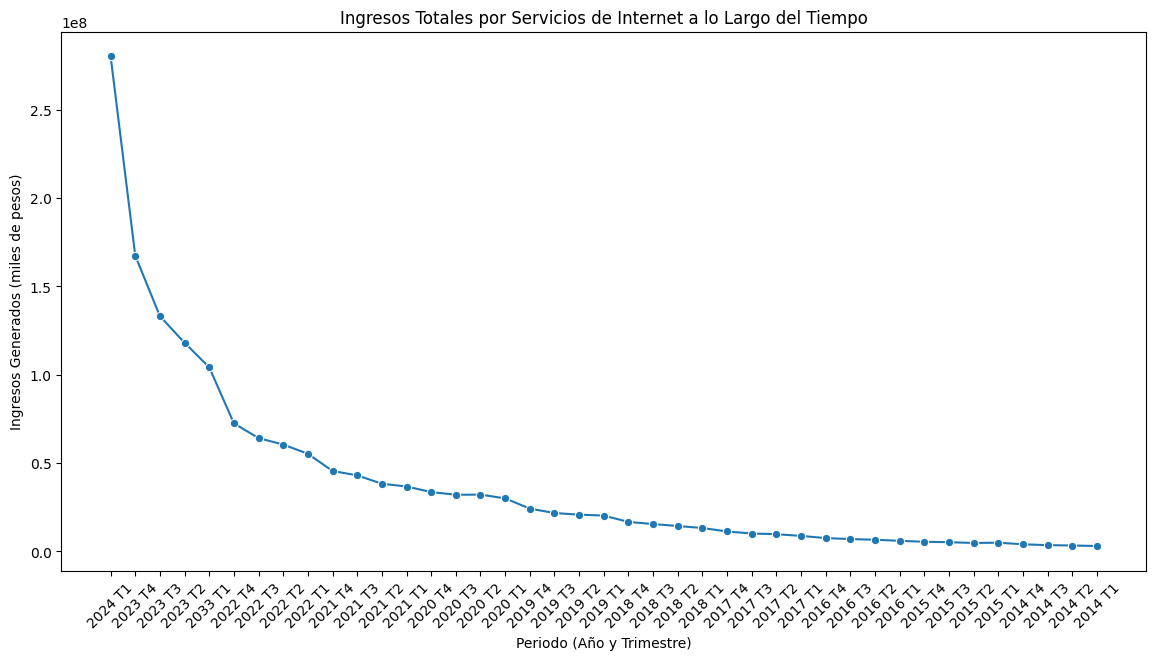

In [28]:
# Cargar los datos de ingresos
ingresos = pd.read_excel(file_path, sheet_name='Ingresos ')

# Crear una columna combinada de año y trimestre para el eje x
ingresos['Periodo'] = ingresos['Año'].astype(str) + ' T' + ingresos['Trimestre'].astype(str)

# Crear el gráfico de líneas para los ingresos a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(x='Periodo', y='Ingresos (miles de pesos)', data=ingresos, marker='o')
plt.title('Ingresos Totales por Servicios de Internet a lo Largo del Tiempo')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Ingresos Generados (miles de pesos)')
plt.xticks(rotation=45)
plt.show()


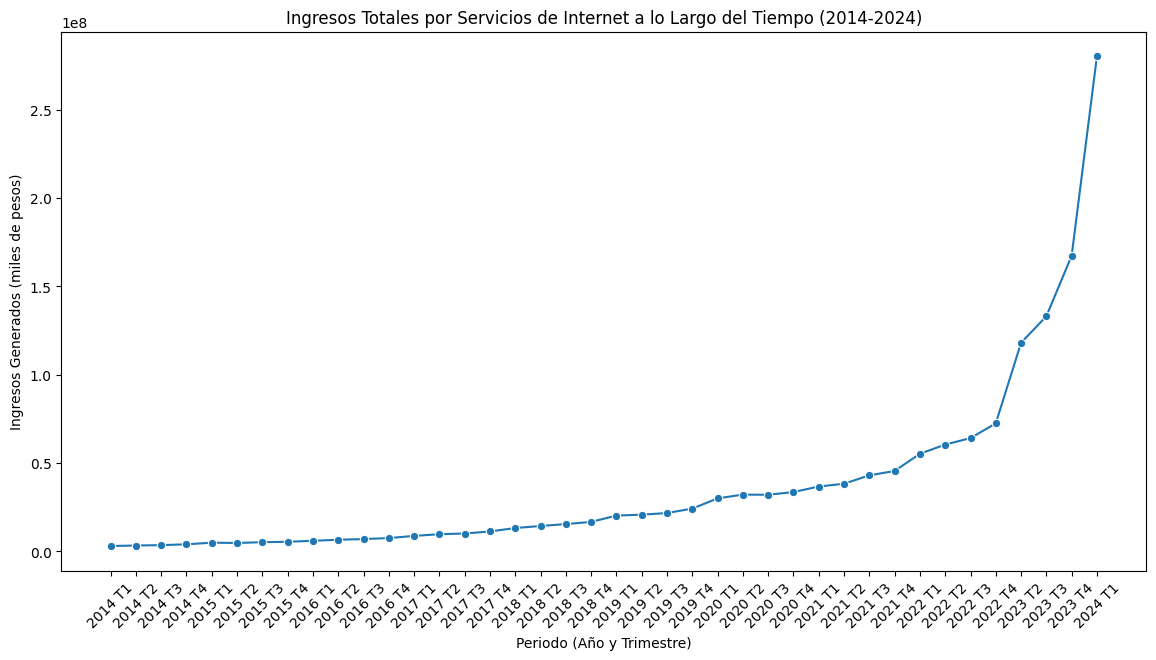

In [29]:
# Filtrar los datos para incluir solo los años entre 2014 y 2024
ingresos_filtrados = ingresos[(ingresos['Año'] >= 2014) & (ingresos['Año'] <= 2024)]

# Ordenar los datos por año y trimestre
ingresos_filtrados = ingresos_filtrados.sort_values(by=['Año', 'Trimestre'])

# Crear una columna combinada de año y trimestre para el eje x
ingresos_filtrados['Periodo'] = ingresos_filtrados['Año'].astype(str) + ' T' + ingresos_filtrados['Trimestre'].astype(str)

# Crear el gráfico de líneas para los ingresos a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(x='Periodo', y='Ingresos (miles de pesos)', data=ingresos_filtrados, marker='o')
plt.title('Ingresos Totales por Servicios de Internet a lo Largo del Tiempo (2014-2024)')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Ingresos Generados (miles de pesos)')
plt.xticks(rotation=45)
plt.show()



### Análisis del Gráfico
Este gráfico muestra cómo han cambiado los ingresos generados por los servicios de internet en Argentina a lo largo del tiempo, ordenando los datos de 2014 a 2024. A continuación, se detallan algunas observaciones clave:

- **Tendencia General:** La gráfica muestra una tendencia general al alza en los ingresos, lo que indica un crecimiento continuo en la adopción de servicios de internet y una disposición de los usuarios a pagar por estos servicios.
- **Crecimiento Continuo:** A lo largo de los años, el crecimiento de los ingresos ha sido constante, con algunos periodos mostrando un crecimiento más acelerado.
- **Fluctuaciones Estacionales:** Las fluctuaciones entre los trimestres pueden estar relacionadas con factores estacionales, como promociones de servicios de internet, lanzamientos de nuevas tecnologías o eventos económicos.
- **Impacto de Eventos:** Algunos picos y valles en la gráfica pueden estar relacionados con eventos específicos, como la implementación de nuevas políticas de telecomunicaciones, el lanzamiento de promociones o planes de acceso a internet, o incluso impactos económicos que afectan la capacidad de los consumidores para suscribirse a servicios de internet.

podemos ver además que desde el año  2022 se acelero el termino de ingresos trimestrales por consumo de internet


In [30]:
# Cargar los datos de penetración de internet en los hogares
penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')

# Verificar las columnas disponibles en el DataFrame
penetracion_hogares.columns


Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

## Análisis de la Penetración de Internet en los Hogares
En este análisis, evaluamos cómo la penetración de internet en los hogares varía entre las diferentes provincias de Argentina.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Penetración de internet en los hogares (porcentaje).

### Análisis del Gráfico
Este gráfico de barras nos permite observar el porcentaje de hogares que tienen acceso a internet en cada provincia.


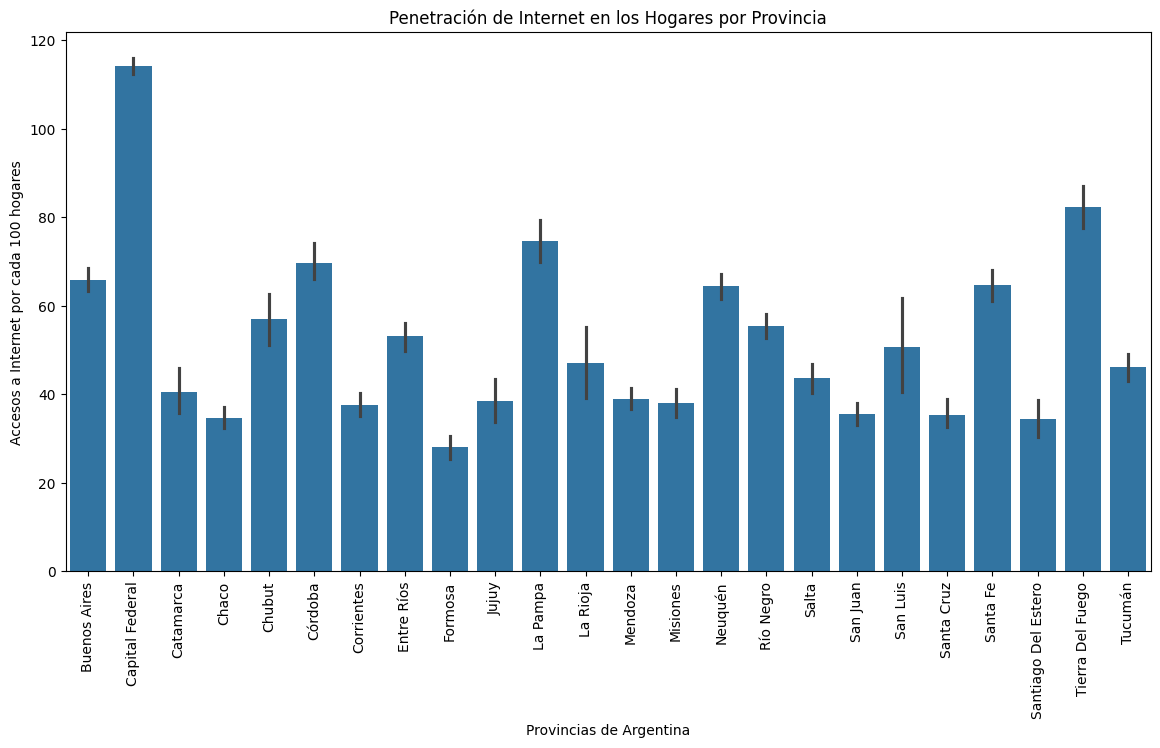

In [31]:
# Cargar los datos de penetración de internet en los hogares
penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=penetracion_hogares)
plt.title('Penetración de Internet en los Hogares por Provincia')
plt.xlabel('Provincias de Argentina')
plt.ylabel('Accesos a Internet por cada 100 hogares')
plt.xticks(rotation=90)
plt.show()


### Análisis del Gráfico
Este gráfico muestra la penetración de internet en los hogares de cada provincia de Argentina. A continuación, se detallan algunas observaciones clave:

- **Provincias con Alta Penetración:** Algunas provincias como Buenos Aires y CABA muestran una alta penetración de internet en los hogares, con más de 100 accesos por cada 100 hogares, lo que sugiere una infraestructura de telecomunicaciones bien desarrollada y una alta adopción de servicios de internet así mismo de inversión. 
- **Provincias con Baja Penetración:** Otras provincias como Formosa y Santiago del Estero tienen una penetración de internet en los hogares más baja, con menos de 30 accesos por cada 100 hogares, lo que podría estar relacionado con desafíos en la infraestructura, menor densidad poblacional o menores ingresos per cápita.
- **Comparación General:** Hay una variabilidad significativa en la penetración de internet en los hogares entre las diferentes provincias, lo que destaca la importancia de las políticas y esfuerzos para mejorar el acceso a internet en áreas menos desarrolladas.
- **Provincias Intermedias:** La mayoría de las provincias tienen entre 50 y 80 accesos por cada 100 hogares, lo que muestra un desarrollo moderado en términos de penetración de internet.

podemos decir que la penetración de internet en los hogares varía considerablemente entre las provincias de Argentina, reflejando diferencias en infraestructura y desarrollo económico.

In [32]:
# Cargar los datos de velocidad de conexión
velocidad_por_prov = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

# Verificamos las columnas disponibles en el DataFrame
velocidad_por_prov.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

## Análisis de Velocidades de Conexión a Internet por Provincia
En este análisis, evaluamos cómo varían las velocidades de conexión a internet entre las diferentes provincias de Argentina.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Velocidad de conexión (Mbps).

### Análisis del Gráfico
Este gráfico de barras nos permite observar la velocidad promedio de conexión a internet en cada provincia.



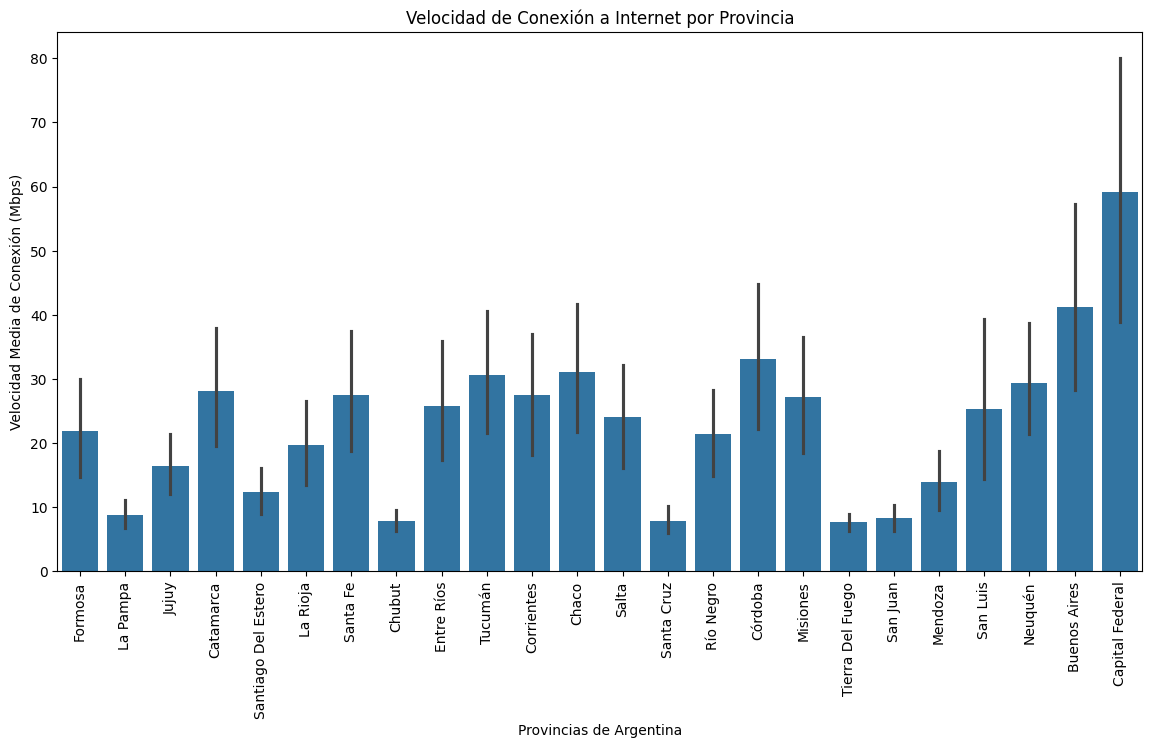

In [37]:
# Ordenar el DataFrame por 'Mbps (Media de bajada)' de menor a mayor
velocidad_por_prov_ordenado = velocidad_por_prov.sort_values(by='Mbps (Media de bajada)', ascending=True)

# Crear el gráfico de barras usando el DataFrame ordenado
plt.figure(figsize=(14, 7))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_por_prov_ordenado, order=velocidad_por_prov_ordenado['Provincia'])
plt.title('Velocidad de Conexión a Internet por Provincia')
plt.xlabel('Provincias de Argentina')
plt.ylabel('Velocidad Media de Conexión (Mbps)')
plt.xticks(rotation=90)
plt.show()



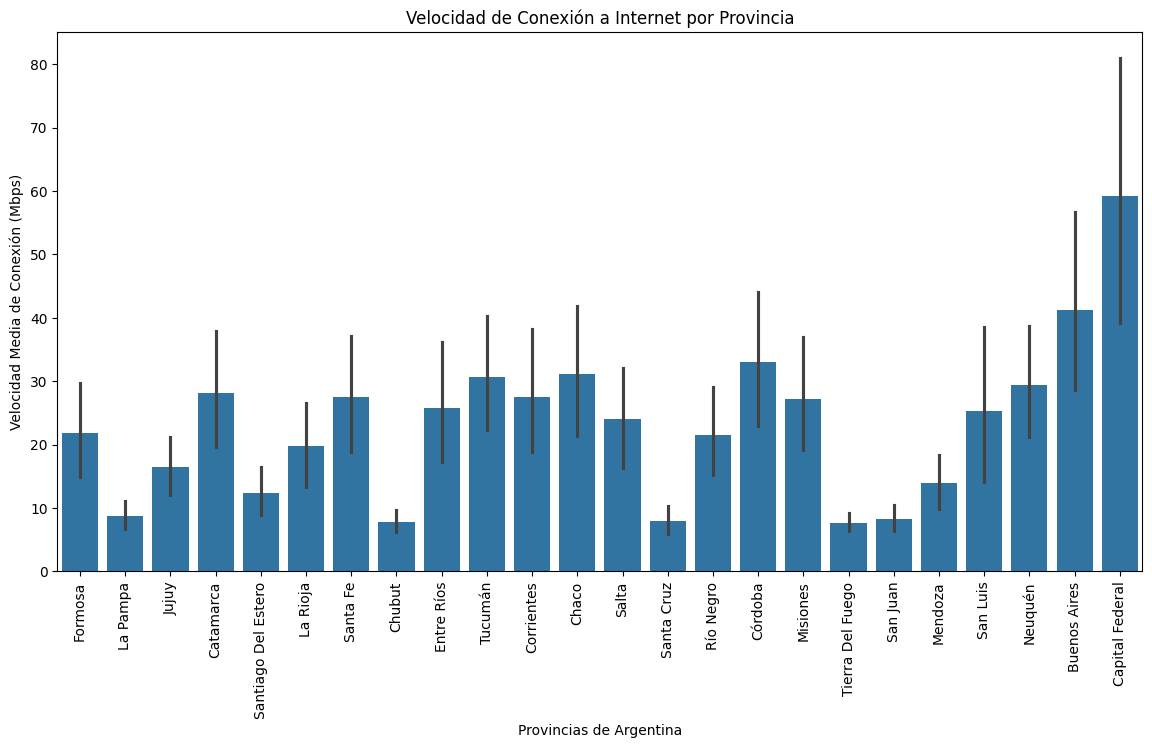

In [40]:
# Ordenar el DataFrame por la columna 'Mbps (Media de bajada)'
velocidad_por_prov_ordenado = velocidad_por_prov.sort_values('Mbps (Media de bajada)', ascending=True)

# Crear el gráfico de barras ordenado
plt.figure(figsize=(14, 7))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_por_prov_ordenado)
plt.title('Velocidad de Conexión a Internet por Provincia')
plt.xlabel('Provincias de Argentina')
plt.ylabel('Velocidad Media de Conexión (Mbps)')
plt.xticks(rotation=90)
plt.show()


### CAnálisis del Gráfico
Este gráfico muestra la velocidad de conexión a internet en cada provincia de Argentina. A continuación, se detallan algunas observaciones clave:

- **Provincias con Alta Velocidad:** Algunas provincias, como Buenos Aires y Capital Federal, muestran velocidades de conexión superiores, lo que sugiere una infraestructura de telecomunicaciones más avanzada y una mayor capacidad para manejar grandes volúmenes de datos.
- **Provincias con Baja Velocidad:** Otras provincias, como Jujuy y La Rioja, tienen velocidades de conexión más bajas, lo que podría estar relacionado con limitaciones en la infraestructura, menor inversión en tecnología o desafíos geográficos.
- **Comparación General:** Hay una variabilidad significativa en las velocidades de conexión entre las diferentes provincias, lo que destaca la importancia de las inversiones en infraestructura para mejorar la calidad del servicio en las áreas con menor velocidad.




## Identificación de Valores Atípicos en las Velocidades de Conexión
En este análisis, identificamos valores atípicos en las velocidades de conexión a internet en las diferentes provincias de Argentina.

### Descripción de los Ejes
- **Eje X:** Provincias de Argentina.
- **Eje Y:** Velocidad de conexión (Mbps).

### Análisis del Gráfico
Este gráfico de cajas nos permite observar los valores atípicos en las velocidades de conexión a internet en cada provincia.


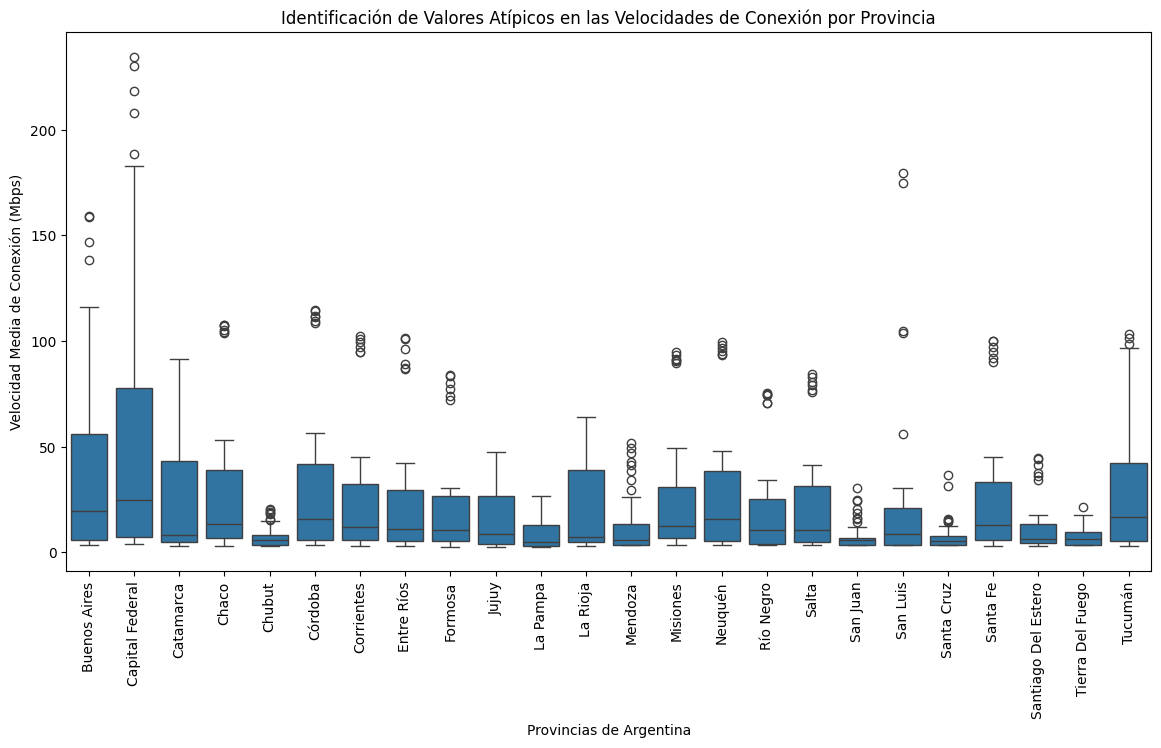

In [41]:
# Cargar los datos de velocidad de conexión
velocidad_por_prov = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

# Crear el gráfico de cajas para identificar outliers
plt.figure(figsize=(14, 7))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_por_prov)
plt.title('Identificación de Valores Atípicos en las Velocidades de Conexión por Provincia')
plt.xlabel('Provincias de Argentina')
plt.ylabel('Velocidad Media de Conexión (Mbps)')
plt.xticks(rotation=90)
plt.show()


### Análisisdel Gráfico
Este gráfico de cajas muestra los valores atípicos en las velocidades de conexión a internet en cada provincia de Argentina. A continuación, se detallan algunas observaciones clave:

- **Valores Atípicos:** Los puntos que se encuentran fuera de los bigotes del gráfico de cajas representan valores atípicos en las velocidades de conexión a internet. Estos valores pueden indicar problemas en la infraestructura, anomalías en los datos o diferencias significativas en la calidad del servicio.
- **Distribución de Velocidades:** El gráfico también muestra la distribución general de las velocidades de conexión en cada provincia, lo que nos permite identificar las provincias con mayor variabilidad en las velocidades de conexión.
- **Provincias con Alta Variabilidad:** Provincias como Buenos Aires y Capital Federal muestran una alta variabilidad en las velocidades de conexión, lo que sugiere diferencias significativas en la calidad del servicio dentro de estas provincias.
- **Provincias con Baja Variabilidad:** Otras provincias muestran una menor variabilidad en las velocidades de conexión, lo que indica una mayor consistencia en la calidad del servicio dentro de esas provincias.



## Relación entre Velocidades de Conexión y Penetración de Internet en los Hogares
En este análisis, exploramos la relación entre las velocidades de conexión a internet y la penetración de internet en los hogares en las diferentes provincias de Argentina.

### Descripción de los Ejes
- **Eje X:** Velocidad de conexión (Mbps).
- **Eje Y:** Accesos a internet por cada 100 hogares.

### Análisis del Gráfico
Este gráfico de dispersión nos permite observar la relación entre las velocidades de conexión a internet y la penetración de internet en los hogares en cada provincia.


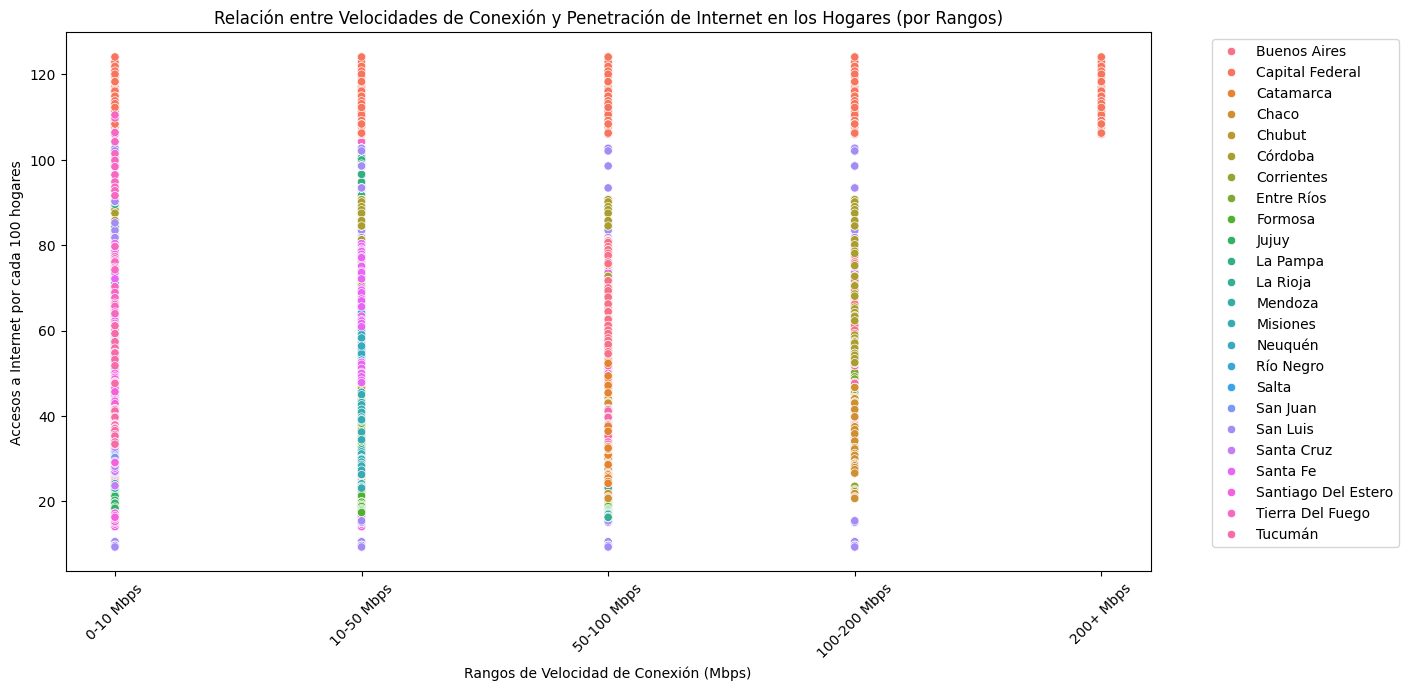

In [42]:
# Cargar los datos de velocidad de conexión y penetración en los hogares
velocidad_por_prov = pd.read_excel(file_path, sheet_name='Velocidad % por prov')
penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')

# Definir los rangos de velocidad
bins = [0, 10, 50, 100, 200, 300]
labels = ['0-10 Mbps', '10-50 Mbps', '50-100 Mbps', '100-200 Mbps', '200+ Mbps']
velocidad_por_prov['Rango Velocidad'] = pd.cut(velocidad_por_prov['Mbps (Media de bajada)'], bins=bins, labels=labels)

# Fusionar los datos por provincia
merged_data = pd.merge(velocidad_por_prov, penetracion_hogares, on='Provincia')

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Rango Velocidad', y='Accesos por cada 100 hogares', hue='Provincia', data=merged_data)
plt.title('Relación entre Velocidades de Conexión y Penetración de Internet en los Hogares (por Rangos)')
plt.xlabel('Rangos de Velocidad de Conexión (Mbps)')
plt.ylabel('Accesos a Internet por cada 100 hogares')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



## Identificación de Provincias con Dificultades en Infraestructura de Internet
En este análisis, identificamos las provincias de Argentina con mayores dificultades de infraestructura de internet, basándonos en la velocidad media de conexión y la penetración de internet en los hogares.

### Descripción de los Ejes
- **Eje X:** Velocidad media de conexión (Mbps).
- **Eje Y:** Accesos a internet por cada 100 hogares.

### Análisis del Gráfico
Este gráfico de dispersión nos permite identificar las provincias con bajas velocidades de conexión y baja penetración de internet en los hogares.


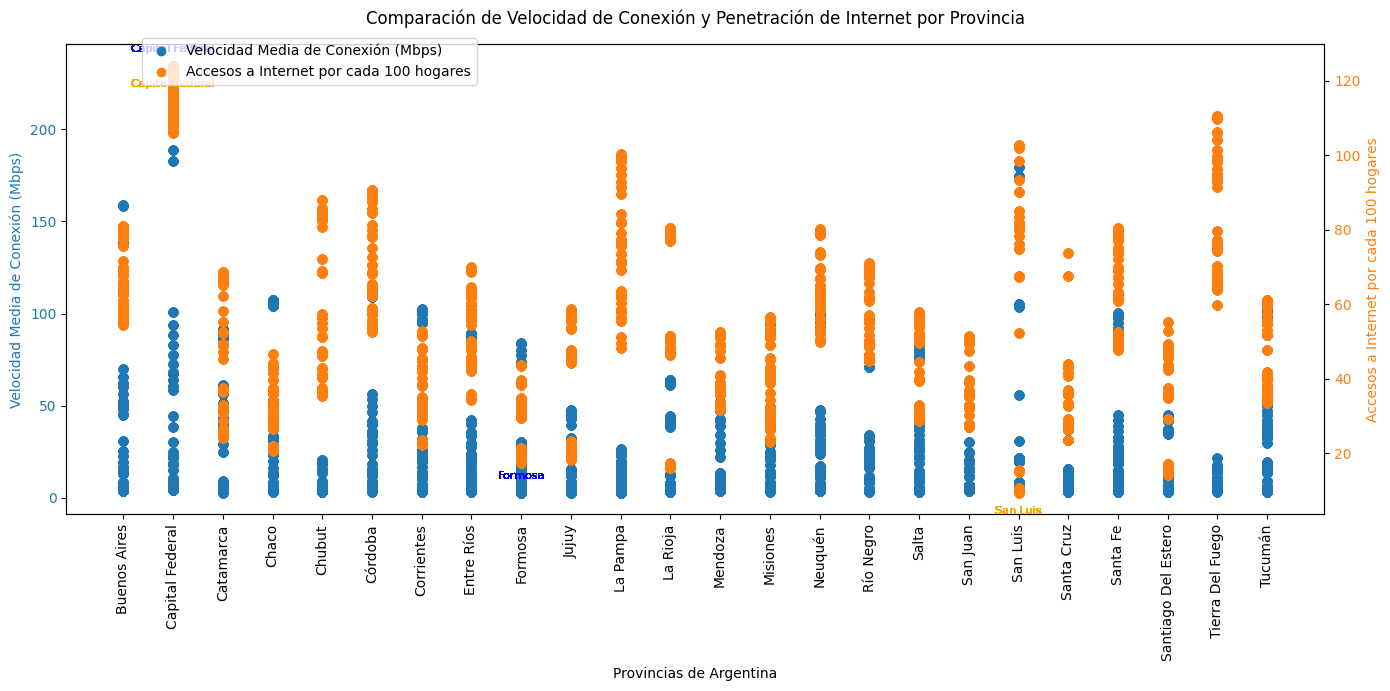

In [43]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Configuración para la velocidad media de conexión
color = 'tab:blue'
ax1.set_xlabel('Provincias de Argentina')
ax1.set_ylabel('Velocidad Media de Conexión (Mbps)', color=color)
ax1.scatter(merged_data['Provincia'], merged_data['Mbps (Media de bajada)'], color=color, label='Velocidad Media de Conexión (Mbps)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje y compartir el mismo eje x
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Accesos a Internet por cada 100 hogares', color=color)
ax2.scatter(merged_data['Provincia'], merged_data['Accesos por cada 100 hogares'], color=color, label='Accesos a Internet por cada 100 hogares')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir etiquetas a los puntos extremos y medianas
for i in range(len(merged_data)):
    if merged_data['Mbps (Media de bajada)'][i] == merged_data['Mbps (Media de bajada)'].max() or merged_data['Mbps (Media de bajada)'][i] == merged_data['Mbps (Media de bajada)'].min():
        ax1.annotate(merged_data['Provincia'][i], (merged_data['Provincia'][i], merged_data['Mbps (Media de bajada)'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
    if merged_data['Accesos por cada 100 hogares'][i] == merged_data['Accesos por cada 100 hogares'].max() or merged_data['Accesos por cada 100 hogares'][i] == merged_data['Accesos por cada 100 hogares'].min():
        ax2.annotate(merged_data['Provincia'][i], (merged_data['Provincia'][i], merged_data['Accesos por cada 100 hogares'][i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color='orange')

# Añadir el título y la leyenda
fig.suptitle('Comparación de Velocidad de Conexión y Penetración de Internet por Provincia')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.95))

plt.show()




### Análisis del Gráfico
Este gráfico mejorado muestra la relación entre la velocidad media de conexión a internet y la penetración de internet en los hogares en cada provincia de Argentina. A continuación, se detallan algunas observaciones clave:

- **Provincias con Alta Velocidad y Alta Penetración:** Provincias como Capital Federal y Buenos Aires destacan por tener tanto altas velocidades de conexión como alta penetración de internet. Esto indica una infraestructura de telecomunicaciones bien desarrollada.
- **Provincias con Baja Velocidad y Alta Penetración:** Algunas provincias, como Chaco y Santiago Del Estero, tienen una baja velocidad media de conexión pero una alta penetración de internet. Esto podría sugerir que, aunque muchas personas tienen acceso a internet, la calidad del servicio podría ser mejorada.
- **Provincias con Baja Velocidad y Baja Penetración:** Provincias como Jujuy y Formosa muestran tanto baja velocidad media de conexión como baja penetración de internet, indicando mayores dificultades de infraestructura que deberían ser priorizadas para mejoras.



C:\Users\jeiso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jeiso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


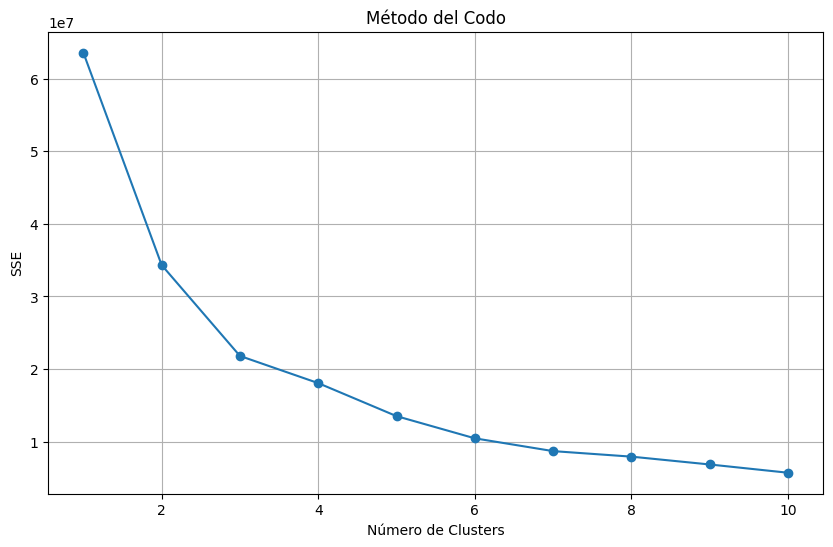

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para el clustering
cluster_data = merged_data[['Mbps (Media de bajada)', 'Accesos por cada 100 hogares']].dropna()

# Método del codo para determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()





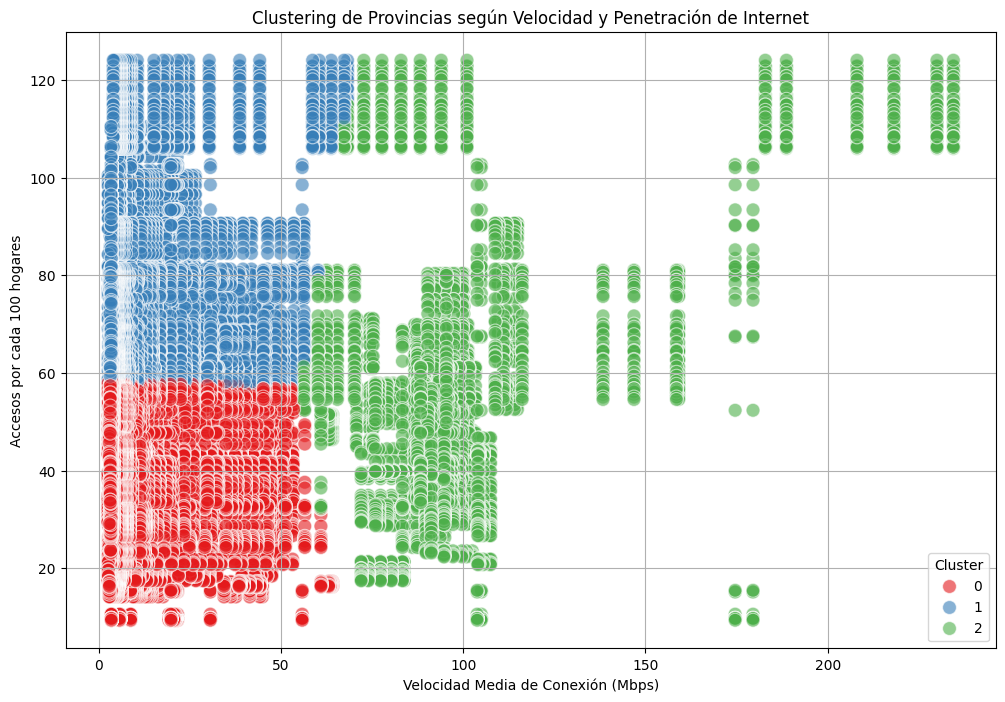

In [45]:
# Seleccionar el número óptimo de clusters (por ejemplo, 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(cluster_data)

# Añadir los resultados del clustering al dataframe original
merged_data['Cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Mbps (Media de bajada)', 
    y='Accesos por cada 100 hogares', 
    hue='Cluster', 
    palette='Set1', 
    data=merged_data, 
    s=100, 
    alpha=0.6
)
plt.title('Clustering de Provincias según Velocidad y Penetración de Internet')
plt.xlabel('Velocidad Media de Conexión (Mbps)')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Resultados de los Clusters
En la gráfica de clustering, observamos tres grupos distintos de provincias, cada uno con características particulares en términos de velocidad de conexión a internet y penetración de internet en los hogares:

### Cluster 0 (Rojo):

Provincias con baja velocidad media de conexión a internet.
Baja penetración de internet en los hogares.
Este cluster representa provincias con infraestructura de telecomunicaciones menos desarrollada.
### Cluster 1 (Azul):

Provincias con velocidad media de conexión a internet moderada.
Moderada penetración de internet en los hogares.
Provincias en este cluster pueden estar en proceso de mejorar su infraestructura de telecomunicaciones.
### Cluster 2 (Verde):

Provincias con alta velocidad media de conexión a internet.
Alta penetración de internet en los hogares.
Estas provincias probablemente tienen una infraestructura de telecomunicaciones bien desarrollada.

El análisis de clusters revela diferencias significativas en el acceso y la calidad de la conexión a internet entre las provincias argentinas. El uso del Método del Codo nos permitió identificar tres grupos principales, que reflejan distintos niveles de desarrollo en infraestructura de telecomunicaciones. Este tipo de segmentación es crucial para diseñar estrategias específicas y dirigidas que aborden las necesidades particulares de cada grupo de provincias, optimizando así los recursos y esfuerzos para mejorar la conectividad en todo el país.








Según los cluster podemos ver que la necesita de implementación en desarrollo tecnológico debe ser guiada a velocidades mayores a  50(mbs)

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import polars as pl

In [47]:
# Cargar el archivo Excel
ruta_archivo = 'Internet.xlsx'
df = pd.read_excel(ruta_archivo, sheet_name=None)

# Seleccionar una hoja relevante para el análisis de regresión lineal
df_penetracion_poblacion = df['Penetración-poblacion']



sheets

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Leer el archivo Excel y seleccionar la hoja correcta
ruta_archivo = 'Internet.xlsx'
df = pd.read_excel(ruta_archivo, sheet_name='Penetración-poblacion')

# Seleccionar las variables independientes y dependientes para el análisis
X = df[['Año', 'Trimestre']]  # Variables independientes
y = df['Accesos por cada 100 hab']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados de la regresión
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Mean Squared Error (MSE): 56.3462690979418
R-squared (R2): 0.12354409306403702
Intercepto: -2331.764170776904
Coeficiente: [1.16235436 0.46083102]


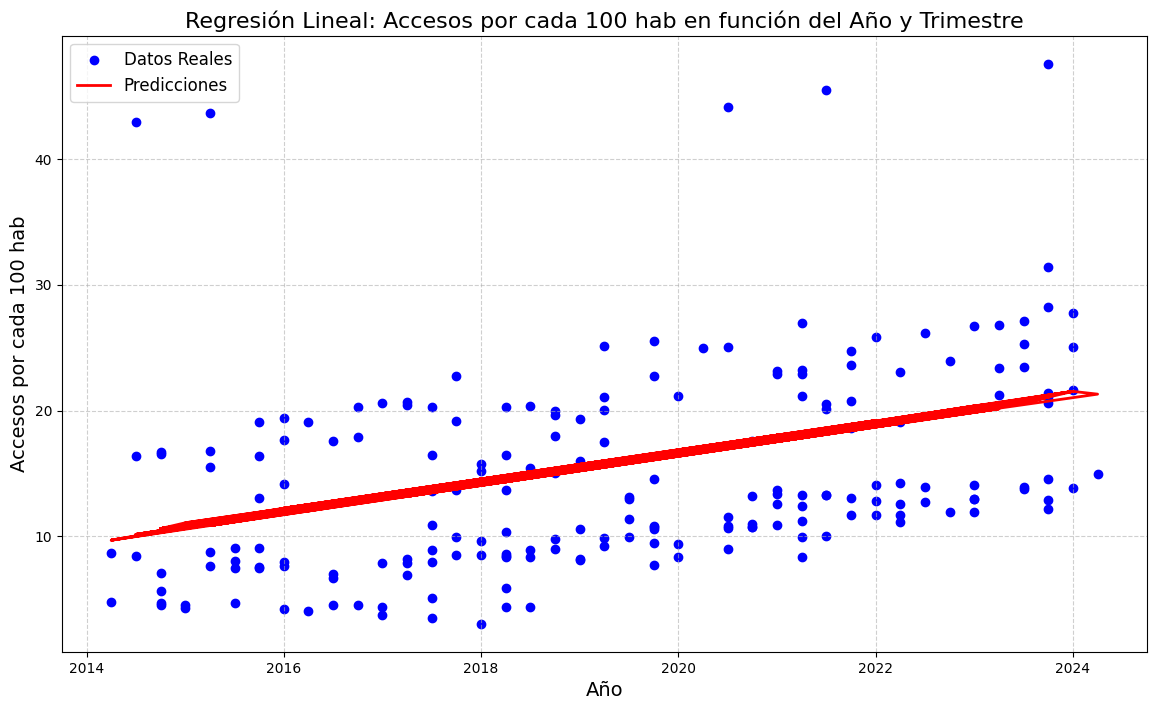

In [49]:
# Visualizar la regresión lineal
plt.figure(figsize=(14, 8))
plt.scatter(X_test['Año'] + X_test['Trimestre']/4, y_test, color='blue', label='Datos Reales')
plt.plot(X_test['Año'] + X_test['Trimestre']/4, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Regresión Lineal: Accesos por cada 100 hab en función del Año y Trimestre', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos por cada 100 hab', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

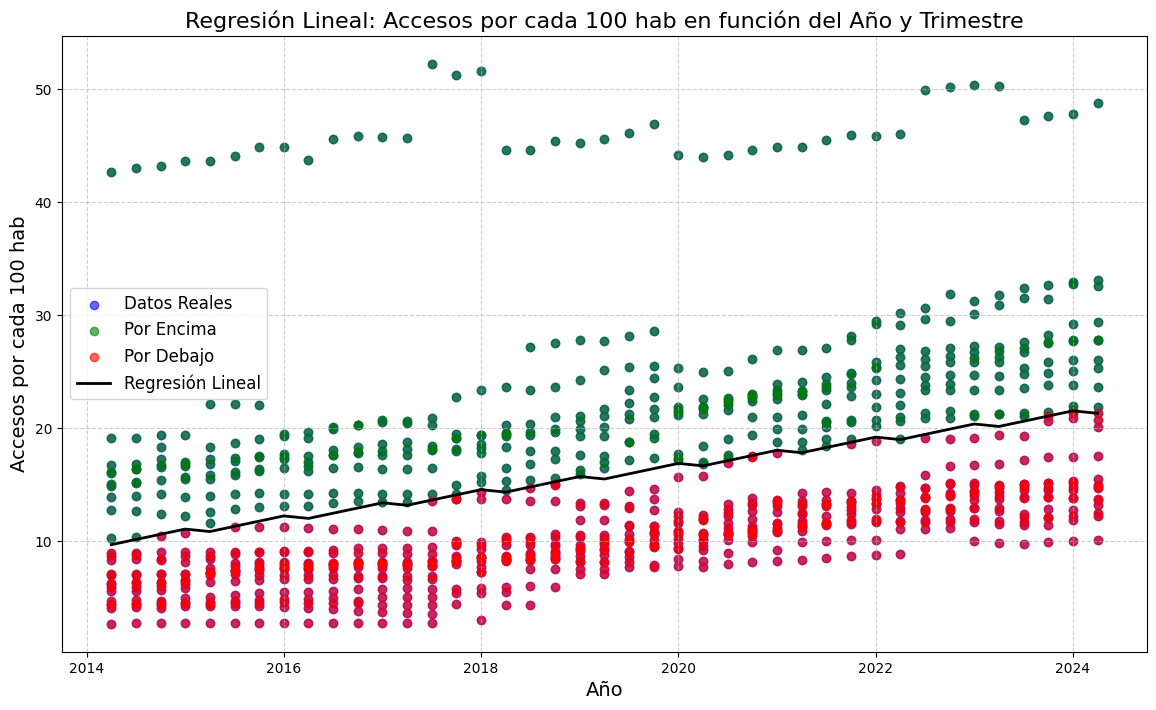

In [50]:
# Visualizar la regresión lineal con mejoras
plt.figure(figsize=(14, 8))

# Calcular la línea de regresión completa
X_full = df[['Año', 'Trimestre']]
y_full_pred = model.predict(X_full)

# Identificar los puntos por encima y por debajo de la línea de regresión
above_line = y > y_full_pred
below_line = ~above_line

# Graficar los puntos
plt.scatter(X_full['Año'] + X_full['Trimestre']/4, y, color='blue', label='Datos Reales', alpha=0.6)
plt.scatter(X_full['Año'][above_line] + X_full['Trimestre'][above_line]/4, y[above_line], color='green', label='Por Encima', alpha=0.6)
plt.scatter(X_full['Año'][below_line] + X_full['Trimestre'][below_line]/4, y[below_line], color='red', label='Por Debajo', alpha=0.6)

# Graficar la línea de regresión
plt.plot(X_full['Año'] + X_full['Trimestre']/4, y_full_pred, color='black', linewidth=2, label='Regresión Lineal')

plt.title('Regresión Lineal: Accesos por cada 100 hab en función del Año y Trimestre', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Accesos por cada 100 hab', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Partículas Verdes: Representan los datos reales de accesos a internet que están por encima de la línea de regresión predicha por el modelo. Esto indica que en estos puntos específicos, el número de accesos fue mayor de lo que el modelo de regresión predijo.

### Partículas Rojas: Representan los datos reales de accesos a internet que están por debajo de la línea de regresión predicha por el modelo. Esto indica que en estos puntos específicos, el número de accesos fue menor de lo que el modelo de regresión predijo.

## Introducción
La gráfica muestra una regresión lineal aplicada a los datos de accesos a Internet por cada 100 habitantes en función del año y trimestre en Argentina. Esta regresión se ha utilizado para identificar la tendencia general en la penetración de Internet a lo largo del tiempo.

### Descripción del Gráfico
Datos Reales: Los puntos azules representan los datos reales de accesos a Internet por cada 100 habitantes en diferentes trimestres desde el año 2014 hasta el año 2024.
Línea de Regresión: La línea roja representa la predicción de la regresión lineal. Esta línea muestra la tendencia general de crecimiento en los accesos a Internet a lo largo del tiempo.
Resultados del Modelo
Intercepto: Representa el valor esperado de la variable dependiente (accesos por cada 100 habitantes) cuando las variables independientes (año y trimestre) son cero. En este caso, el intercepto es aproximadamente 11.3417.
Coeficiente: Indica la magnitud y dirección de la relación entre las variables independientes y la variable dependiente. En este caso, el coeficiente es aproximadamente 0.1623 para el año y 0.4608 para el trimestre, lo que sugiere una ligera tendencia de aumento en los accesos a Internet con el paso del tiempo.
MSE (Error Cuadrático Medio): Es una medida de la precisión del modelo. Un valor más bajo indica una mejor precisión. En este caso, el MSE es 28.614.
R-squared (Coeficiente de Determinación): Indica la proporción de la variabilidad en la variable dependiente que puede ser explicada por las variables independientes. En este caso, el R-squared es aproximadamente 0.15, lo que sugiere que las variables independientes explican una parte pequeña de la variabilidad en los accesos a Internet.
### Interpretación
La tendencia general muestra un incremento en los accesos a Internet por cada 100 habitantes a lo largo del tiempo. Sin embargo, el coeficiente de determinación (R-squared) indica que hay otros factores importantes no incluidos en este modelo que también afectan la penetración de Internet.



In [51]:
# Cargar datos existentes
datos_internet = pd.read_excel('Internet.xlsx', sheet_name='Penetración-poblacion')

# Cargar nuevos datos
mapa_conectividad = pd.read_excel('mapa_conectividad.xlsx')
servicios_postales = pd.read_excel('servicios_postales.xlsx')

# Asegurarnos de que las columnas tengan nombres únicos
mapa_conectividad.columns = ['Mapa_' + str(col) for col in mapa_conectividad.columns]
servicios_postales.columns = ['Postales_' + str(col) for col in servicios_postales.columns]

# Unir los datos en un único DataFrame
datos_combinados = pd.concat([datos_internet, mapa_conectividad, servicios_postales], axis=1)

# Mostrar las primeras filas del DataFrame combinado para verificar la combinación
print(datos_combinados.head())

      Año  Trimestre        Provincia  Accesos por cada 100 hab  \
0  2024.0        1.0     Buenos Aires                     27.80   
1  2024.0        1.0  Capital Federal                     48.78   
2  2024.0        1.0        Catamarca                     17.50   
3  2024.0        1.0            Chaco                     12.48   
4  2024.0        1.0           Chubut                     26.02   

  Mapa_Provincia Mapa_Partido     Mapa_Localidad  Mapa_Población Mapa_ADSL  \
0   BUENOS AIRES   25 de Mayo         25 de Mayo           23408        SI   
1   BUENOS AIRES   25 de Mayo    Agustín Mosconi             280        --   
2   BUENOS AIRES   25 de Mayo          Del Valle             899        SI   
3   BUENOS AIRES   25 de Mayo          Ernestina             145        SI   
4   BUENOS AIRES   25 de Mayo  Gobernador Ugarte             547        --   

  Mapa_Cablemódem  ... Postales_Unnamed: 5 Postales_id Postales_año  \
0              SI  ...                 NaN         NaN   

In [53]:
print(velocidad_por_prov.columns)


Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)',
       'Rango Velocidad'],
      dtype='object')


Debemos asegurarnos de que la variable sea de tipo entero

In [54]:
#Transformar variable a tipo entero
velocidad_por_prov['Año'] = velocidad_por_prov['Año'].astype(int)

In [55]:
# Agrupar por Año y calcular la media de velocidad por cada año
velocidad_media_por_anio = velocidad_por_prov.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

In [56]:
# Calcular la tasa de crecimiento año tras año
velocidad_media_por_anio['Tasa de Crecimiento'] = velocidad_media_por_anio['Mbps (Media de bajada)'].pct_change() * 100

In [57]:

# Eliminar el primer año porque no tiene tasa de crecimiento
velocidad_media_por_anio = velocidad_media_por_anio.dropna()

Ahora bien como el dataset solo tiene un trimestre para el 2024 procedemos a  completar los demas trimestres basados en los datos de los años anteriores

In [59]:
# Calcular la media de los trimestres anteriores para el 2024
media_trimestral_2023 = velocidad_media_por_anio[velocidad_media_por_anio['Año'] == 2023]['Tasa de Crecimiento'].mean()

# Completar los trimestres faltantes en el 2024
velocidad_media_por_anio.loc[velocidad_media_por_anio['Año'] == 2024, 'Tasa de Crecimiento'] = media_trimestral_2023


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


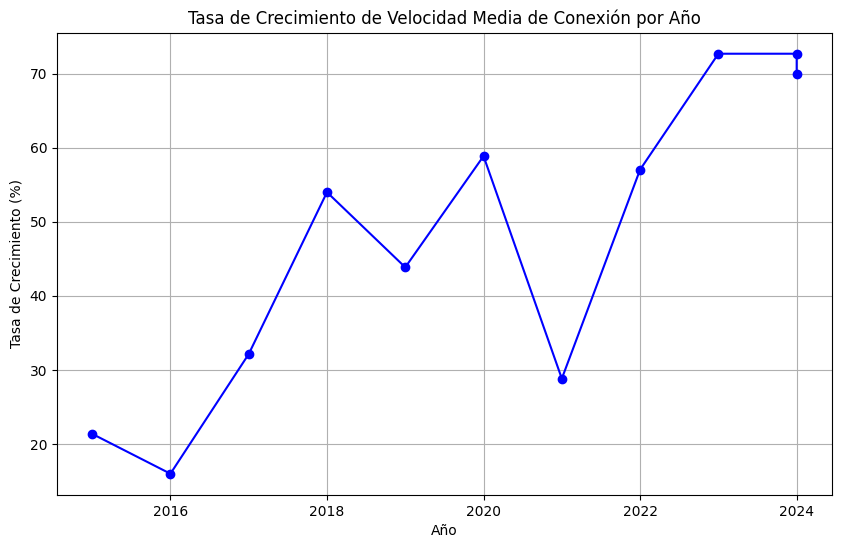

In [63]:


# Filtrar los datos excluyendo el año 2024
train_data = velocidad_media_por_anio[velocidad_media_por_anio['Año'] < 2024]

# Variables independientes (Año) y dependiente (Tasa de Crecimiento)
X = train_data[['Año']]
y = train_data['Tasa de Crecimiento']

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Datos para predecir (Año 2024)
X_predict = pd.DataFrame({
    'Año': [2024]
})

# Realizar la predicción
y_predict = model.predict(X_predict)

# Añadir las predicciones al DataFrame original
predicted_data = pd.DataFrame({
    'Año': [2024],
    'Tasa de Crecimiento': y_predict
})

# Unir los datos predichos con el DataFrame original
velocidad_media_por_anio_completo = pd.concat([velocidad_media_por_anio, predicted_data])

# Crear el gráfico de la tasa de crecimiento con las predicciones
plt.figure(figsize=(10, 6))
plt.plot(velocidad_media_por_anio_completo['Año'], velocidad_media_por_anio_completo['Tasa de Crecimiento'], marker='o', linestyle='-', color='b')
plt.title('Tasa de Crecimiento de Velocidad Media de Conexión por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.grid(True)
plt.show()


NameError: name 'combined_df' is not defined

In [73]:
# Cargar las hojas correspondientes
dial_baf_df = pd.read_excel(file_path, sheet_name='Dial-BAf')
totales_dial_baf_df = pd.read_excel(file_path, sheet_name='Totales Dial-BAf')

In [75]:
# Agrupar por provincia y sumar las conexiones Dial-up
provincia_dial_up = dial_baf_df.groupby('Provincia')['Dial up'].sum().reset_index()

In [76]:
# Ordenar de mayor a menor
top_5_provincias_dial_up = provincia_dial_up.sort_values(by='Dial up', ascending=False).head(5)


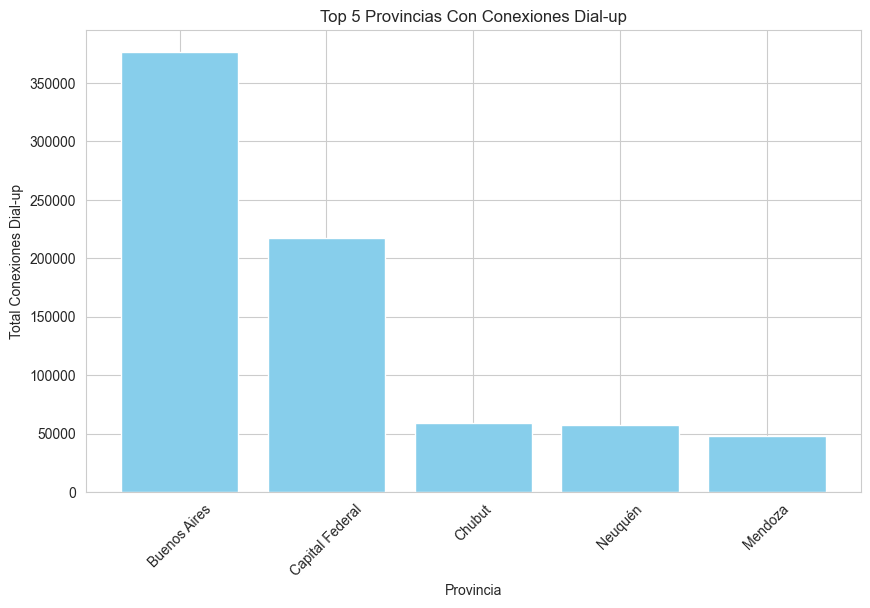

In [97]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(top_5_provincias_dial_up['Provincia'], top_5_provincias_dial_up['Dial up'], color='skyblue')
plt.title('Top 5 Provincias Con Conexiones Dial-up')
plt.xlabel('Provincia')
plt.ylabel('Total Conexiones Dial-up')
plt.xticks(rotation=45)
plt.show()

In [79]:
accesos_tecnologia_localidad = pd.read_excel('Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')
dial_baf = pd.read_excel('Internet.xlsx', sheet_name='Dial-BAf')

# Relacionar las provincias
merged_df = pd.merge(accesos_tecnologia_localidad, dial_baf, on='Provincia', how='inner')

# Verificar el resultado
merged_df.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Año,Trimestre,Banda ancha fija,Dial up,Total
0,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2024,1,155925,165.0,156090
1,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,4,154520,165.0,154685
2,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,3,148751,165.0,148916
3,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,2,140575,173.0,140748
4,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,1,135281,182.0,135463


In [80]:
# Filtrar las provincias del top 5 en uso de Dial-BAf
top_provincias = merged_df.groupby('Provincia')['Dial up'].sum().nlargest(5).index

# Filtrar las localidades dentro de esas provincias
top_localidades = merged_df[merged_df['Provincia'].isin(top_provincias)]

# Verificar las localidades
top_localidades.head()


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Año,Trimestre,Banda ancha fija,Dial up,Total
0,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2024,1,155925,165.0,156090
1,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,4,154520,165.0,154685
2,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,3,148751,165.0,148916
3,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,2,140575,173.0,140748
4,San Luis,Ayacucho,Candelaria,74007010,0,0,0,372,0,0,0,885,1257,2023,1,135281,182.0,135463


In [81]:
# Agrupar por localidad y sumar las conexiones Dial-up
localidades_dial_baf = top_localidades.groupby(['Provincia', 'Localidad'])['Dial up'].sum().reset_index()

# Ordenar por mayor uso de Dial-up
localidades_dial_baf = localidades_dial_baf.sort_values(by='Dial up', ascending=False)

# Mostrar los resultados
localidades_dial_baf.head()


,Provincia,Localidad,Dial up
60,San Luis,OTROS,30858.0
51,San Luis,Los Molles,20572.0
0,San Luis,Alto Pelado,10286.0
58,San Luis,Nogolí,10286.0
67,San Luis,Renca,10286.0


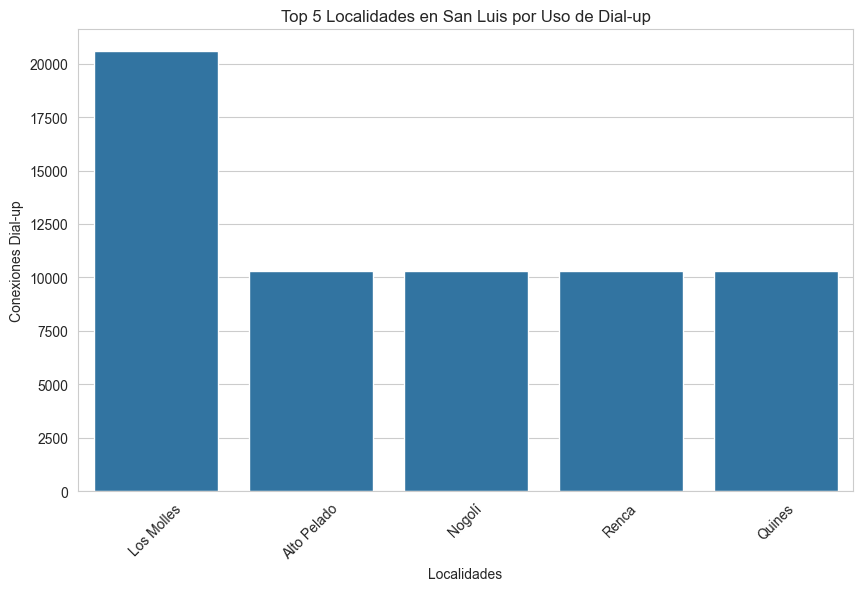

In [85]:
# Filtrar las 10 provincias principales con mayor uso de Dial-up
top_10_provincias = localidades_dial_baf.groupby('Provincia')['Dial up'].sum().nlargest(10).index.tolist()

# Crear gráficas de barras para las 5 localidades principales en cada una de las provincias principales, excluyendo "OTROS"
for provincia in top_10_provincias:
    localidades_provincia = localidades_dial_baf[(localidades_dial_baf['Provincia'] == provincia) & (localidades_dial_baf['Localidad'] != 'OTROS')]
    
    # Filtrar las 5 localidades principales por conexiones Dial-up
    top_5_localidades = localidades_provincia.nlargest(5, 'Dial up')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Localidad', y='Dial up', data=top_5_localidades)
    plt.title(f'Top 5 Localidades en {provincia} por Uso de Dial-up')
    plt.xlabel('Localidades')
    plt.ylabel('Conexiones Dial-up')
    plt.xticks(rotation=45)
    plt.show()

### Brecha digital:

## San luis una de las principales ciudades con menos accesos por tecnología:
Podemos ver que en la ciudad de  san luis que es una de las ciudades con menos accesos por tecnología además cuentan con tecnología obsoleta los principales localidades son los molles, Alto pelado, Nogolí , Renca y Quines.


In [99]:
# Filtrar el DataFrame para obtener solo las filas con conexiones Dial-up
dial_up_df = accesos_tecnologia_localidad[accesos_tecnologia_localidad['DIAL UP'] > 0]

# Mostrar el DataFrame filtrado
dial_up_df.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
8,BUENOS AIRES,9 de Julio,9 de Julio,6588100,4241,3553,80,6238,0,0,0,831,14943
15,BUENOS AIRES,Adolfo Alsina,Carhué,6007010,766,0,1,1417,1,0,0,1066,3251
20,BUENOS AIRES,Adolfo Gonzales Chaves,Adolfo Gonzales Chaves (Est. Chaves),6014010,464,0,2,943,0,0,0,690,2099
24,BUENOS AIRES,Alberti,Alberti (Est. Andrés Vaccarezza),6021010,335,0,6,1,0,0,0,2,344
28,BUENOS AIRES,Almirante Brown,Adrogué,6028010,86,9355,53,12087,91,1,0,26,21699


In [100]:
# Filtrar el DataFrame para obtener solo las filas de Buenos Aires
buenos_aires_df = dial_up_df[dial_up_df['Provincia'] == 'BUENOS AIRES']

# Ordenar las ciudades por el número de conexiones Dial-up en orden descendente
top_5_dial_up_buenos_aires = buenos_aires_df.sort_values(by='DIAL UP', ascending=False).head(5)

# Mostrar el DataFrame resultante
print(top_5_dial_up_buenos_aires)


        Provincia             Partido           Localidad Link Indec  ADSL  \
365  BUENOS AIRES            La Plata            La Plata    6441030  7362   
264  BUENOS AIRES  General Pueyrredón       Mar del Plata    6357110  9494   
58   BUENOS AIRES        Bahía Blanca        Bahía Blanca    6056010  3774   
640  BUENOS AIRES              Tandil              Tandil    6791050   797   
489  BUENOS AIRES            Necochea  Necochea - Quequén    6581040  2444   

     CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
365      136126      517         54565   2651          9      0      3908   
264      115206      512        149753     35          6      0      1460   
58       103360      388         14732     64          8      0      2764   
640       42239      184          3326     83          3      0      1004   
489        3447      145         16887     29          1      0      3316   

     Total general  
365         205138  
264         276466  
58   

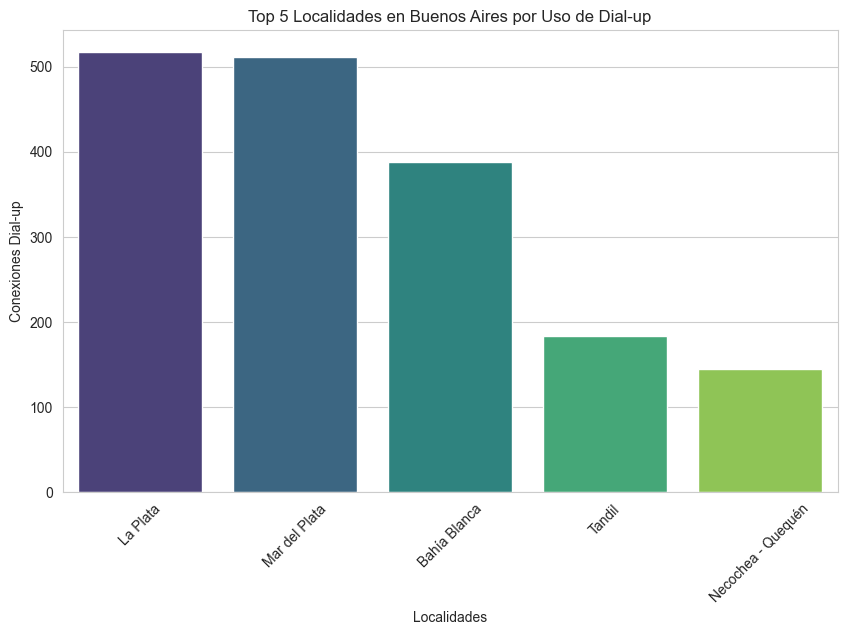

In [108]:
# Filtrar el DataFrame para obtener solo las filas de Buenos Aires
buenos_aires_df = accesos_tecnologia_localidad[accesos_tecnologia_localidad['Provincia'] == 'BUENOS AIRES']

# Ordenar las ciudades por el número de conexiones Dial-up en orden descendente
top_5_dial_up_buenos_aires = buenos_aires_df.sort_values(by='DIAL UP', ascending=False).head(5)

# Crear la gráfica con la paleta 'Viridis'
plt.figure(figsize=(10, 6))
sns.barplot(x='Localidad', y='DIAL UP', hue='Localidad', data=top_5_dial_up_buenos_aires, palette='viridis', dodge=False, legend=False)
plt.title('Top 5 Localidades en Buenos Aires por Uso de Dial-up')
plt.xlabel('Localidades')
plt.ylabel('Conexiones Dial-up')
plt.xticks(rotation=45)
plt.show()

##  Migración de Dial-up a Tecnologías Avanzadas

### Brecha Digital y Infraestructura Anticuada

El uso continuo de la tecnología Dial-up en ciertas ciudades de Buenos Aires es un claro indicador de una **brecha digital** significativa. La persistencia de este tipo de conexión señala que la infraestructura de telecomunicaciones en estas áreas es anticuada o insuficiente para soportar tecnologías modernas, como la banda ancha o la fibra óptica. Esta situación no solo limita el acceso a internet de alta velocidad, sino que también restringe las oportunidades de desarrollo económico, educativo y social en estas regiones.

### Oportunidad de Generación de Ingresos

Desde una perspectiva empresarial, la migración de usuarios de Dial-up a conexiones de banda ancha o fibra óptica representa una **oportunidad de mercado significativa**. Los proveedores de servicios de internet (ISP) pueden aprovechar esta brecha digital para ofrecer servicios de actualización tecnológica, que no solo mejorarían la calidad de vida de los habitantes, sino que también generarían un nuevo flujo de ingresos. La modernización de la infraestructura en estas áreas permitiría a los ISP expandir su base de clientes y aumentar sus márgenes de ganancia.

### Impacto en la Inclusión Digital y el Desarrollo Regional

Para los gobiernos y las políticas públicas, cerrar esta brecha digital es crucial para fomentar la **inclusión digital**. La implementación de programas de subsidios o incentivos para la expansión de redes de alta velocidad en estas áreas podría acelerar la modernización de la infraestructura de telecomunicaciones. Esto no solo contribuiría al desarrollo económico regional, sino que también reduciría las desigualdades tecnológicas entre diferentes regiones del país.




C:\Users\jeiso\AppData\Local\Temp\ipykernel_11980\3305079949.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Periodo', y='KPI_Aumento_Acceso', data=totales_accesos_tecnologia, palette='viridis')


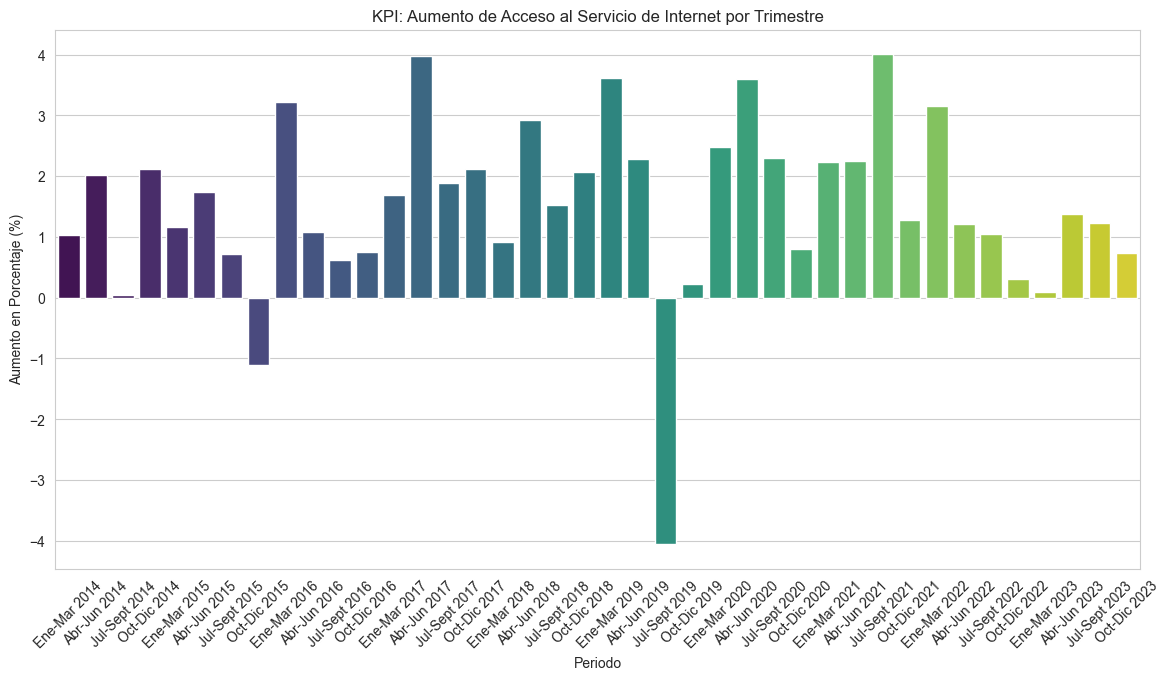

In [116]:

# Cargar los datos de la hoja "Totales Accesos Por Tecnología"
archivo_excel = 'Internet.xlsx'
totales_accesos_tecnologia = pd.read_excel(archivo_excel, sheet_name='Totales Accesos Por Tecnología')

# Ordenar los datos por año y trimestre
totales_accesos_tecnologia = totales_accesos_tecnologia.sort_values(by=['Año', 'Trimestre'])

# Calcular el KPI de aumento de acceso al servicio de Internet
totales_accesos_tecnologia['Nuevo Acceso'] = totales_accesos_tecnologia['Total'].shift(-1)
totales_accesos_tecnologia['KPI_Aumento_Acceso'] = ((totales_accesos_tecnologia['Nuevo Acceso'] - totales_accesos_tecnologia['Total']) / totales_accesos_tecnologia['Total']) * 100

# Eliminar los valores nulos (último trimestre no tiene siguiente)
totales_accesos_tecnologia = totales_accesos_tecnologia.dropna(subset=['KPI_Aumento_Acceso'])

# Graficar el KPI por trimestre
plt.figure(figsize=(14, 7))
sns.barplot(x='Periodo', y='KPI_Aumento_Acceso', data=totales_accesos_tecnologia, palette='viridis')
plt.title('KPI: Aumento de Acceso al Servicio de Internet por Trimestre')
plt.ylabel('Aumento en Porcentaje (%)')
plt.xticks(rotation=45)
plt.show()


In [117]:
# Filtrar las columnas necesarias
totales_accesos_tecnologia = totales_accesos_tecnologia[['Año', 'Trimestre', 'Total']]

In [120]:
# Ordenar los datos por Año y Trimestre
totales_accesos_tecnologia = totales_accesos_tecnologia.sort_values(by=['Año', 'Trimestre'])

# Calcular el KPI de aumento en el acceso al servicio de Internet
totales_accesos_tecnologia['Nuevo Acceso'] = totales_accesos_tecnologia['Total'].shift(-1)
totales_accesos_tecnologia['KPI_Aumento_Acceso'] = ((totales_accesos_tecnologia['Nuevo Acceso'] - totales_accesos_tecnologia['Total']) / totales_accesos_tecnologia['Total']) * 100

# Eliminar los valores nulos
totales_accesos_tecnologia = totales_accesos_tecnologia.dropna(subset=['KPI_Aumento_Acceso'])



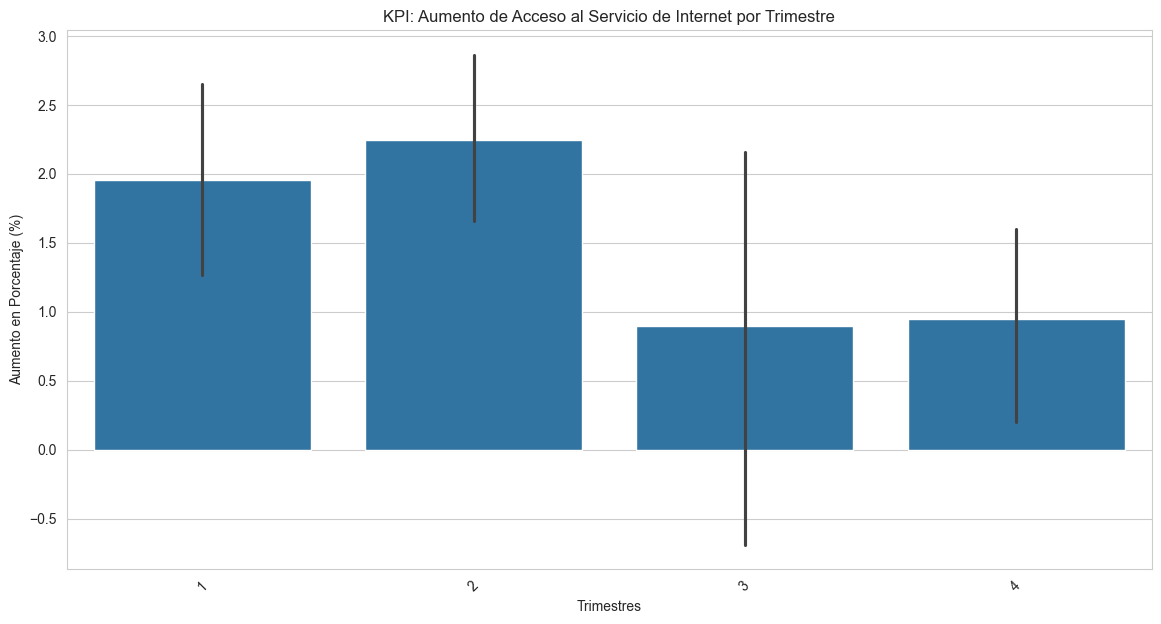

In [123]:
# Graficar el KPI por trimestre
plt.figure(figsize=(14, 7))
sns.barplot(x='Trimestre', y='KPI_Aumento_Acceso', data=totales_accesos_tecnologia)
plt.title('KPI: Aumento de Acceso al Servicio de Internet por Trimestre')
plt.ylabel('Aumento en Porcentaje (%)')
plt.xlabel('Trimestres')
plt.xticks(rotation=45)
plt.show()


### Interpretación de la Gráfica del KPI: Aumento de Acceso al Servicio de Internet por Trimestre

La gráfica muestra el KPI del aumento en el acceso al servicio de Internet por trimestre, representado como un porcentaje. Este KPI es clave para medir la efectividad de las estrategias implementadas para incrementar la penetración de Internet en los hogares.

#### Análisis por Trimestre:
- **Trimestre 1 y 2**: Se observa un aumento en el porcentaje de acceso a Internet, superando el 2%, lo cual indica un buen desempeño en la expansión del servicio.
- **Trimestre 3**: Aunque todavía hay un aumento, es más moderado comparado con los trimestres anteriores.
- **Trimestre 4**: Muestra un crecimiento más bajo, lo que podría señalar desafíos o limitaciones en las estrategias utilizadas.

Este KPI, junto con otros indicadores relevantes, puede guiar las decisiones para mejorar la conectividad en las provincias y asegurar que más hogares tengan acceso a Internet, contribuyendo al desarrollo digital y económico de las regiones.


In [124]:
# Guardar los dataframes en archivos CSV para importarlos a Power BI
totales_accesos_tecnologia.to_csv('totales_accesos_tecnologia.csv', index=False)
accesos_tecnologia_localidad.to_csv('accesos_tecnologia_localidad.csv', index=False)
velocidad_por_prov.to_csv('velocidad_por_prov.csv', index=False)
acc_vel_loc_sinrangos.to_csv('acc_vel_loc_sinrangos.csv', index=False)
velocidad_sin_rangos.to_csv('velocidad_sin_rangos.csv', index=False)